# JAMES CHUKWUKA TABANSI 

## Context:
- DeltaSquare is an NGO that works with the Government on matters of social policy to bring about a change in the lives of underprivileged sections of society. They are tasked with coming up with a policy framework by looking at the data government got from WHO. You as a data scientist at DeltaSquare are tasked with solving this problem and sharing a proposal for the government.

## Problem Description:
- Certain people in Society are under stringent living conditions and one of the ways to ease their struggle for sustained livelihood is by implementing the appropriate social policy. A sustainable future is dependent on the type of social policy that will be implemented based on the insights and recommendations from this project.

## Objectives of the Project:
- The dataset aims to answer the following key questions:

    * What are the different factors that influence the income of an individual?
    
    * What insights will guide the government in structuring an appropriate policy framework that will augment living conditions of the underpriviledge sections of society.
    

    * Is there a good predictive model for income that exists?
    
    * What does the performance assessment look like for such a model?
    
## Model and Metrics
- The project seeks to classify any individual based on his or her income as either priviledged or underpriviledged hence, it is a classification problem and would require a classification model.
- Both Logistic Regression and Tree Based models will be used and the best model will be selected based on their performance.


- More focus will be at identifying an underpriviledged person correctly. This is because there is little problem in identifying a rich man as a poor man. however, it is a problem to classify a poor man that is sufferring as a rich person as he or she may not be able to recieve the help they want if our policy recommendations were implemented because they will be treated as people who do not need such help.
    - people with lower salary will be termed underpriviledged and classified as 1
    - people with higher salary will be termed priviledged and classified as 0
- therefore, efforts will be at reducing incorrectly classified 1s as 0s. This means I will aim to increase the recall of my model.

### Data Dictionary (Attribute Information): 
- The data Download data contains characteristics of the people

- age: continuous - age of a Person
- workclass: Where do a person works - categorical -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: This weight is assigned by the Current Population Survey (CPS). People with similar demographic characteristics should have similar weights since it is a feature aimed to allocate similar weights to people with similar demographic characteristics - continuous
- education: Degree the person has - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: no. of years a person studied - continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: Investment gain of the person other than salary - continuous
- capital-loss: Loss from investments - continuous
- hours-per-week: No. of hours a person works - continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- salary: >50K, <=50K (dependent variable, the salary is in Dollars per year)




### Import Relevant Libraries

In [1]:
#for loading data as dataframes
import pandas as pd

#for numerical process
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns


### Load the Data

In [2]:
#declare the path
path = "/Users/user/Downloads/who_data.csv"

#read the data
data = pd.read_csv(path)

#view a sample of the data
data.sample(n=5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
3774,49,Self-emp-inc,362654,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,50,United-States,>50K
5835,37,Self-emp-not-inc,121510,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Male,0,0,55,United-States,<=50K
5202,41,Local-gov,297248,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,45,United-States,>50K
32136,37,Private,338033,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
16449,32,Private,169589,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,>50K


### EDA

In [3]:
#return the number of columns and rows in the data
data.shape 

(32561, 15)

- there are 32,561 rows and 15 columns in the data

In [4]:
#give descriptive information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education_no_of_years   32561 non-null  int64 
 5   marital_status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   relationship            32561 non-null  object
 8   race                    32561 non-null  object
 9   sex                     32561 non-null  object
 10  capital_gain            32561 non-null  int64 
 11  capital_loss            32561 non-null  int64 
 12  working_hours_per_week  32561 non-null  int64 
 13  native_country          32561 non-null  object
 14  salary                  32561 non-null  object
dtypes:

- at first glance, this suggests that there are no missing values in the data.
- age, fnlwgt, education_no_of_years, capital_gain, capital_loss and working_hours_per_week are of numerical values
- other features are object datatypes

In [5]:
#check for duplicates
data.duplicated().sum()

24

- there are 24 duplicated entries in the data

In [6]:
#drop duplicates
data.drop_duplicates(inplace=True)

#check again
data.duplicated().sum()

0

In [7]:
# display the value count for each categorical features
#subset the categorical columns
cat_cols = data.select_dtypes(include="object")

#itirate over the columns in cat_cols and return the value count
for col in cat_cols:
    print(col.upper()) #print the column name in capital letters
    print(data[col].value_counts())  #count the value of each subcategory
    print('-'* 10)  # separate each of them

WORKCLASS
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
----------
EDUCATION
 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int64
----------
MARITAL_STATUS
 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
----------
OC

- workclass
    * most of the people are private workers
    * there seem to be 1836 missing values misrepresented as ?
- NATIVE_COUNTRY
    * there seem to be 583 missing values misrepresented as ?
- OCCUPATION
    * there seem to be 1843 missing values misrepresented as ?
    
- they will be properly replaced with Nan

In [8]:
#replace '?' in these columns with np.nan
data[['workclass', 'native_country', 'occupation']] = data[['workclass', 'native_country', 'occupation']].replace(to_replace="?", value= np.nan)

In [9]:
data.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    0
dtype: int64

- the above operation is not having any effect, to find out why, i will subset the row of workclass that has '?' to see how it is displayed

In [10]:
# display the value count for each categorical features
#subset the categorical columns
cat_cols = data.select_dtypes(include="object")

#itirate over the columns in cat_cols and return the value count
for col in cat_cols:
    print(col.upper()) #print the column name in capital letters
    print(data[col].unique())  #display the unique item of each subcategory
    print('-'* 10)  # separate each of them

WORKCLASS
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
----------
EDUCATION
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
----------
MARITAL_STATUS
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
----------
OCCUPATION
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
----------
RELATIONSHIP
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
----------
RACE
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
----------
SEX
[' Male' ' Femal

- each values in the categorical columsn all have leading white spaces

In [11]:
#replace ' ?' in these columns with np.nan
data[['workclass', 'native_country', 'occupation']] = data[['workclass', 'native_country', 'occupation']].replace(to_replace=" ?", value= np.nan)

In [12]:
data.isnull().sum()

age                          0
workclass                 1836
fnlwgt                       0
education                    0
education_no_of_years        0
marital_status               0
occupation                1843
relationship                 0
race                         0
sex                          0
capital_gain                 0
capital_loss                 0
working_hours_per_week       0
native_country             582
salary                       0
dtype: int64

- successful. This shows that workclass, occupation and native_country have 1836,1843 and 583 missing values respectively

In [13]:
#display a statistical description of the dataset
data.describe(include='all').T #show both numerical and categorical columns in transposed form

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32537.0,NaN,NaN,NaN,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
workclass,30701,8,Private,22673,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32537.0,NaN,NaN,NaN,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education,32537,16,HS-grad,10494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_no_of_years,32537.0,NaN,NaN,NaN,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
marital_status,32537,7,Married-civ-spouse,14970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,30694,14,Prof-specialty,4136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32537,6,Husband,13187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32537,5,White,27795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32537,2,Male,21775,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- age
    * the mean age is 38.58, the median age is 37. this suggest an approximate normal distribution of the age
    * the youngest person is 17 years and the oldest person 90. however, 75% of the entire people are below 48years old. this indicates the presence of outliers in this feature.
    

- workclass
    * there 8 different type of workclass any individual. however, private workers are the most frequent
    * column has missing values
- fnlwgt
    - People with similar demographic characteristics should have similar weights 
    * 75% of the people have weight below 237,051. however the maximum is 1,484,705. this suggest heavy outliers in the feature and indicates that the gap between the fewer rich and the many poor people is big. That could explain why the distribution is expected to be right skewed since the mean is affected by the outliers and is not close or equal to the median

- education
    * there are 16 unique categories in the dataset
    * 10,501 are HS-grad (high school grad) and this is the mode meaning that a larger proportion of the people are just high school graduates

- education_no_of_years
    * the minimum years sepnt in school by anybody in this data was 1 year
    * the maximum years spent was 16
    * this feature is expected to be normally distributed because the mean is approximately equal to the median of 10 years. which means that 50% of the people in the data have been to school for at most 10years.

- marital_status
    * the people in the data are classified under 7 different categories
    * 14,976 of them are Married-civ-spouse which is the mode.

- occupation
    * under this column, the people in the data are classified as belonging to one of 14 different categories
    * 4,140 of them are Prof-specialty	which is the mode

- relationship
    * there are 6 relationship categories in the data, and 13,193 of the people were husbands

- race
    * there are 5 race classes in the data
    * 27,816 of the people identified to be white and this was the most frequent

- sex
    * there are 2 sex groups in the data
    * Male	persons were 21,790 in number

- capital_gain
    * 75% of the entire population have no other stream of income
    * the maximum capital gain recorded was  99,999
    * this feature is expected to have a right skewed distribution

- capital_loss
    * 75% of the entire population never recorded any loss from investment
    * the maximum capital loss recorded was 4,356
    * this feature is expected to have a right skewed distribution

- working_hours_per_week
    - there are 168 hours in a week and 75% of the population work for 45hours while majority work for 40 hours. the maximum hours anybody recorded in a week was 99. this must be tedious.

- native_county
    * there are 41 countries identified in the data and United-States is the mode with 29,170 identified citizens
    * there are missing values in the feature
- salary
    * 24,720 people out of 32,561 have salries <=50K.

In [14]:
#create a copy of the data for futher exploration
df = data.copy()

In [15]:
x = len(df.query("capital_gain > 0 & salary == ' <=50K'")) 
# x is the number of people with investments but are still classifed as less priviledge

#subset the data to know people with other income streams that have salary <= 50k
df.query("capital_gain > 0 & salary == ' <=50K'")

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
59,30,Private,188146,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,5013,0,40,United-States,<=50K
60,30,Private,59496,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,2407,0,40,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
113,28,Private,377869,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,4064,0,25,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32388,40,Private,260425,Assoc-acdm,12,Separated,Tech-support,Unmarried,White,Female,1471,0,32,United-States,<=50K
32434,34,Private,213307,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,White,Female,7443,0,35,United-States,<=50K
32473,41,Federal-gov,160467,Masters,14,Divorced,Prof-specialty,Unmarried,White,Female,1506,0,40,United-States,<=50K
32515,66,Federal-gov,47358,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,3471,0,40,United-States,<=50K


- this shows that although some people had other income streams they were still classified as less priviledge

In [16]:
# y is the number of people with investment and are classifed as priviledged
y = len(df.query("capital_gain > 0 & salary == ' >50K'"))

df.query("capital_gain > 0 & salary == ' >50K'")

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
84,44,Private,343591,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,14344,0,40,United-States,>50K
101,44,Private,198282,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,60,United-States,>50K
105,32,Self-emp-inc,317660,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7688,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,48,Self-emp-inc,185041,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,50,United-States,>50K
32466,37,Private,121521,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,45,United-States,>50K
32518,57,Local-gov,110417,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
32538,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K


In [17]:
if y > x:
    print("more people with investments had salary >50k")

more people with investments had salary >50k


### key point
- this implies that poor people do not have other streams of income and richer people have investments,

## insight
- government should be adviced to create alternative investment opportunities or ammend fiscal and monetary policies that makes it easier for people to invest securely and maximize gains

In [18]:
# i want to know what kind of enterprise (workclass) the privildge are in

df.groupby( 'salary')['workclass'].value_counts(ascending = True)

salary  workclass        
 <=50K   Never-worked            7
         Without-pay            14
         Self-emp-inc          494
         Federal-gov           589
         State-gov             945
         Local-gov            1476
         Self-emp-not-inc     1816
         Private             17712
 >50K    State-gov             353
         Federal-gov           371
         Local-gov             617
         Self-emp-inc          622
         Self-emp-not-inc      724
         Private              4961
Name: workclass, dtype: int64

- people who never worked or are without-pay are less priviledged based on the data
could this be as a result of the age factor or education barrier?

- people who work in private insitutions and Self-emp-not-inc are depicted to be a type of businesses that most privilege people are in. however, there are a number of people earning below 50k that still own or work in a private business.
- self-emp-inc  is the only workclass category that has higher proportion of richer people to poor people.
- 17,733 people who work in private companies are still classified as less priviledged only 4,963 people that work in private establishment earn above 50k.

does this mean that only a few proportion of people in private instituitons are wealthy? and could this be seen to affect the society negatively by creating huge income gaps between the previledged and underpreviledged.

### key point
- Government should consider passing bills that will increase the salaries of workers under the local, state and federal government
- create welcoming business environment for people to venture into self-emp-inc type of businesses because this is the only workclass that has higher proportion of richer people to poor people.
- government could increase the minimum wage of employed people and mandate private institutions to comply.

In [19]:
# in what capacity do people who earn above 50k function as in a private institution?
#subset of priviledge people
rich = df.query("salary == ' >50K'")

#group the subset based on their occupation and count the value
rich.groupby('salary')['occupation'].value_counts()


salary  occupation        
 >50K    Exec-managerial      1968
         Prof-specialty       1858
         Sales                 983
         Craft-repair          929
         Adm-clerical          507
         Transport-moving      320
         Tech-support          283
         Machine-op-inspct     249
         Protective-serv       211
         Other-service         137
         Farming-fishing       115
         Handlers-cleaners      86
         Armed-Forces            1
         Priv-house-serv         1
Name: occupation, dtype: int64

- this shows that exec-managerial postions and prof-specialty are positions that most of the people that earn above 50K occupy.
- in the entire armed forces, only 1 person earn above 50K annually
- it shows that people who specialize in technical skills or jobs that require high level knowledge earn more.

In [20]:
#show a subset of armed-forces personnel that earn below 50K
df.query("occupation == ' Armed-Forces' & salary == ' <=50K'")

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
442,24,Federal-gov,191073,HS-grad,9,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,<=50K
1300,29,Federal-gov,301010,Some-college,10,Never-married,Armed-Forces,Not-in-family,Black,Male,0,0,60,United-States,<=50K
14613,39,Federal-gov,227597,HS-grad,9,Never-married,Armed-Forces,Not-in-family,White,Male,0,0,50,United-States,<=50K
16111,24,Federal-gov,287988,Bachelors,13,Never-married,Armed-Forces,Not-in-family,White,Male,0,0,40,United-States,<=50K
18034,34,Federal-gov,172716,12th,8,Married-civ-spouse,Armed-Forces,Husband,White,Male,0,0,40,United-States,<=50K
18644,23,Federal-gov,163870,Some-college,10,Never-married,Armed-Forces,Other-relative,White,Male,0,0,40,United-States,<=50K
18769,30,Federal-gov,76313,HS-grad,9,Married-civ-spouse,Armed-Forces,Other-relative,Amer-Indian-Eskimo,Male,0,0,48,United-States,<=50K
32316,23,Federal-gov,173851,HS-grad,9,Never-married,Armed-Forces,Not-in-family,White,Male,0,0,8,United-States,<=50K


- this shows that most of the people in armed forces are High school graduates and are not married.
- they do not have any form of investments.


In [21]:
#show a subset of armed-forces personnel that earn above 50K
df.query("occupation == ' Armed-Forces' & salary == ' >50K'")

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
25799,46,Federal-gov,344415,Masters,14,Married-civ-spouse,Armed-Forces,Husband,White,Male,0,1887,40,United-States,>50K


- this shows that the only person identifed as an armed-force personel has a masters degree, married and has investments.

### key point
- the social policy should carter for the military officers. it should sensitize them on investment opportunities.
- it should also create more study opportunities for officers that want to further their studies.

#### check the age class and years of education of people who never worked or are without pay

In [22]:
#show a subset of data with workclass == without-pay 
df.query("workclass == ' Without-pay'")

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
1901,65,Without-pay,27012,7th-8th,4,Widowed,Farming-fishing,Unmarried,White,Female,0,0,50,United-States,<=50K
9257,19,Without-pay,344858,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,20,United-States,<=50K
15533,21,Without-pay,232719,HS-grad,9,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States,<=50K
15695,22,Without-pay,302347,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,4416,0,40,United-States,<=50K
16812,46,Without-pay,142210,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,25,United-States,<=50K
20073,65,Without-pay,172949,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,2414,0,20,United-States,<=50K
21944,52,Without-pay,198262,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,30,United-States,<=50K
22215,19,Without-pay,43887,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
24596,62,Without-pay,170114,Assoc-acdm,12,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
25500,29,Without-pay,212588,Some-college,10,Married-civ-spouse,Farming-fishing,Own-child,White,Male,0,0,65,United-States,<=50K


In [23]:
#show a subset of data with workclass == Never-worked
df.query("workclass == ' Never-worked'")

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
5361,18,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K


In [24]:
#return the most frequent number of years people with salary above 50K have spent educating themselves
df['education_no_of_years'][df["salary"] == ' >50K'].mode()

0    13
dtype: int64

In [25]:
#return the most frequent number of years people with salary below 50K and have neverworked have spent educating themselves
df['education_no_of_years'][(df["salary"] == ' <=50K') & (df["workclass"] == ' Never-worked')].mode()

0     6
1    10
dtype: int64

In [26]:
#return the most frequent number of years people with salary below 50K and are withoutpay have spent educating themselves
df['education_no_of_years'][(df["salary"] == ' <=50K') & (df["workclass"] == ' Without-pay')].mode()

0    9
dtype: int64

- this shows that most people who earn above 50K have spent 13years in school while people who are without pay and have never worked have lesser number of years.

### key point
- social policy should augment efforts channelled at educating the less priviledged such as scholarship opportunities, study grants etc. this could breach the knowledge gap

In [27]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'working_hours_per_week',
       'native_country', 'salary'],
      dtype='object')

In [28]:
df.groupby( 'salary')['occupation'].value_counts(ascending = True)

salary  occupation        
 <=50K   Armed-Forces            8
         Priv-house-serv       146
         Protective-serv       438
         Tech-support          644
         Farming-fishing       877
         Transport-moving     1277
         Handlers-cleaners    1283
         Machine-op-inspct    1751
         Exec-managerial      2097
         Prof-specialty       2278
         Sales                2667
         Other-service        3154
         Craft-repair         3165
         Adm-clerical         3261
 >50K    Armed-Forces            1
         Priv-house-serv         1
         Handlers-cleaners      86
         Farming-fishing       115
         Other-service         137
         Protective-serv       211
         Machine-op-inspct     249
         Tech-support          283
         Transport-moving      320
         Adm-clerical          507
         Craft-repair          929
         Sales                 983
         Prof-specialty       1858
         Exec-managerial    

## Univariate Analysis

In [29]:
def labeled_barplot(data, feature, perc=False,n=None):
# """this function will plot a labelled count plot for the feature
# data:dataframe
# feature: column
# perc: boolean, percentage value to be displayed
# n: int, display top n category"""
    total = len(data[feature])
    count= data[feature].nunique()
    
    if n is None:
        plt.figure(figsize=(count, 5))
    else:
        plt.figure(figsize=(n+1, 5))
    plt.title(feature + " countplot")
    
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    ax = sns.countplot(
            data=data,
            x=feature,
            order = data[feature].value_counts().index[:n].sort_values(),
        palette="Paired")
    
    for i in ax.patches:
        if perc == True: #if percentage is true
            label = "{:.2f}%".format(#display the format as 2 digits after the dot
            (i.get_height()/total) * 100) #convert the height value to percentage
        else:
            label = i.get_height() #if perc is false display on height value

        x = i.get_x() + i.get_width() / 2  # width of the plot
        y = i.get_height()  # height of the plot

        ax.annotate(text=label, xy=(x, y), #display label on cordinates x_ax, y
                    va="center", ha="center", #align it to the center of both vertical and horizontal axis
                    xytext = (0,5), #gap between the text relative to the bars
                    textcoords="offset points")
    plt.show()
    

# this function will serve to easily help us plot a histogram and a boxplot with shared x-axis.
def histogram_boxplot(data, feature, figsize=(9, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    kind: specifies if a histogram or countplot should be plotted
    """
    
    f1, (ax_box, ax_hist) = plt.subplots(2, 1, #fig should appear in a 2 rows and 1 column style
                                     #nrows=2, #number of rows on grid = 2
                                    sharex = True, # share the x column
                                    gridspec_kw={"height_ratios": (0.25, 0.75)},
                                        figsize = figsize)

    # plot the boxplot
    # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color="mediumturquoise")
    
        #plot the hisstogram
    if bins != None:
            #if bins is specified
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, bins=bins, color="mediumpurple")
    else:
            #if bins is not specified
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, color="mediumpurple")

        ax_hist.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram

        ax_hist.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram
    


In [30]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'working_hours_per_week',
       'native_country', 'salary'],
      dtype='object')

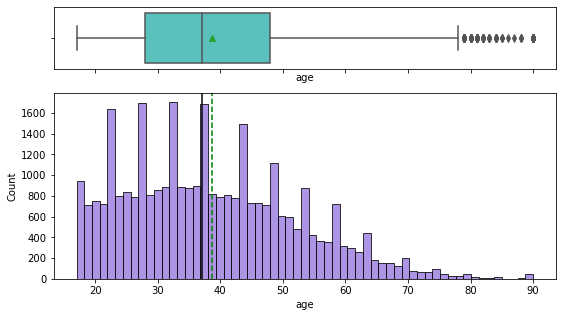

In [31]:
histogram_boxplot(data=df, feature='age')

- the distribution is right skewed and shows the presence of outliers
- the outliers represent old people. they are fewer compared to other age class and the plot shows that majority of the people in the data are young people.

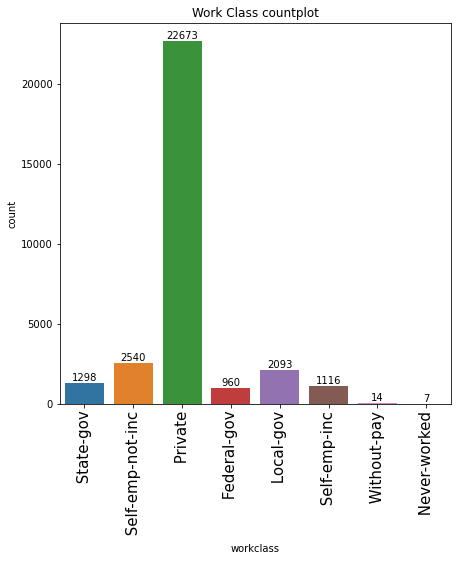

In [32]:
plt.figure(figsize=(7,7)) #create a figure
plt.title('Work Class countplot')  #title of plot
ax = sns.countplot(x= 'workclass', data= df)  #display a countplot
plt.xticks(rotation = 90, fontsize=15)  #rotate the values of the x-axis
for i in ax.patches:  #for each bar in the plot
    label = i.get_height() #display on height value as label

    x = i.get_x() + i.get_width() / 2  # width of the plot
    y = i.get_height()  # height of the plot

    ax.annotate(text=label, xy=(x, y), #display label on cordinates x_ax, y
                va="center", ha="center", #align it to the center of both vertical and horizontal axis
                    xytext = (0,5), #gap between the text relative to the bars
                    textcoords="offset points")

    
plt.show()

- the chart shows that most people (22,696) work for private companies. 
- aside the people that never worked and those without-pay category, the federal government is the lowest employer of power

### insight
- the federal government should aim to employ more people.

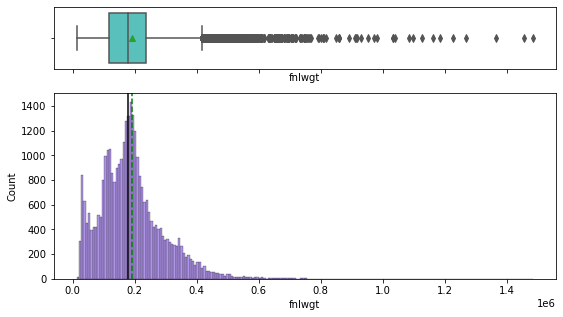

In [33]:
histogram_boxplot(data=df, feature='fnlwgt')


- the distribution is seen to be approximately uniform. however, there are outliers to the right.
- 50% of the population have weight below 0.2. very few people have weights from 0.4 to 1.4. this means that the richer populace are far lesser.

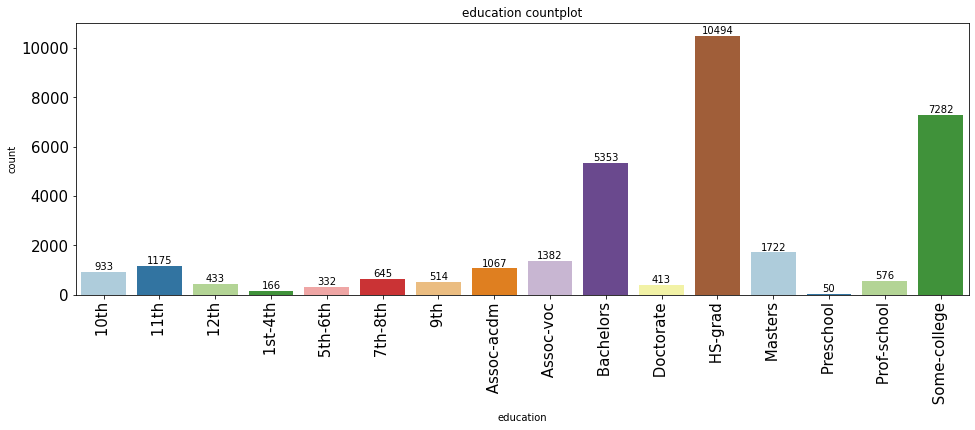

In [34]:
labeled_barplot(data=df, feature='education')


- most of the people in our data are HS-graduates
- there are fewer masters graduates than bachelors

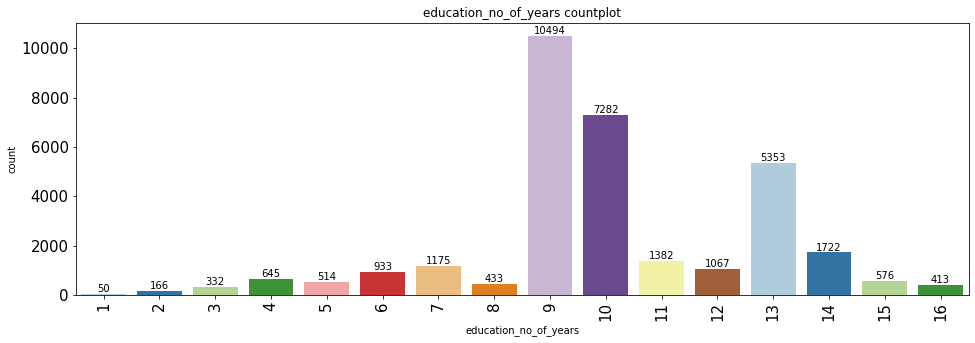

In [35]:
labeled_barplot(data=df, feature='education_no_of_years')

- this shows that most people spent either 9 0r 10 years in school.
- the mode is 9years, and it shows that HS-graduates spend 9 years in school.

In [36]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'working_hours_per_week',
       'native_country', 'salary'],
      dtype='object')

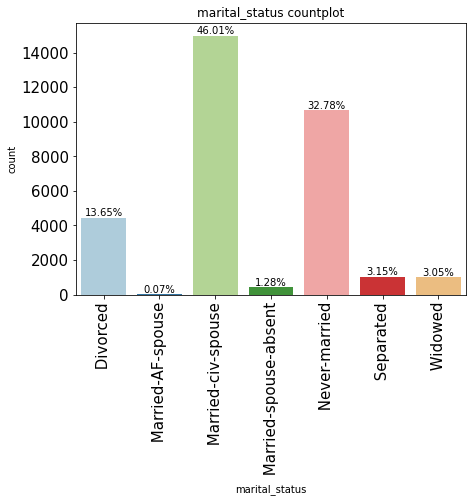

In [37]:
labeled_barplot(data=df, feature='marital_status', perc= True)

- 46% of people in the data identified as married while 33% were never married
- these categories needs to be regrouped.

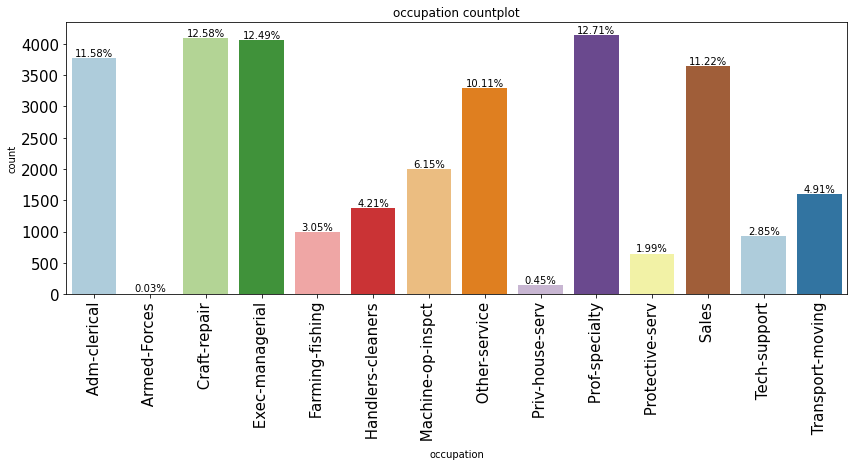

In [38]:
labeled_barplot(data=df, feature='occupation', perc= True)

- craft-repair and prof-specialty are the two most frequent kind of occupation in the dataset.
- admin-clerical, exec-managerial, sales and other-service are other kinds of occupation that other people identified with more.

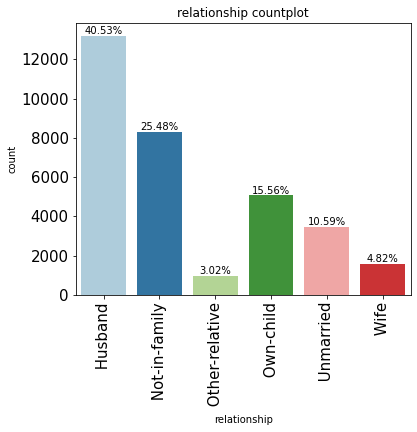

In [39]:
labeled_barplot(data=df, feature='relationship', perc= True)

- 40.5% of the people are husbands while 4.82% are wives
- 25.51% are not in a family
- 15.56% own a child while 10.58% are unmarried

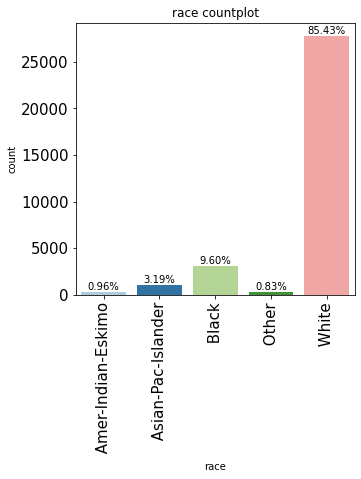

In [40]:
labeled_barplot(data=df, feature='race', perc= True)


- majority of the people in the data (85.43%) identified as white.
- 9.59% identified to be blacks.

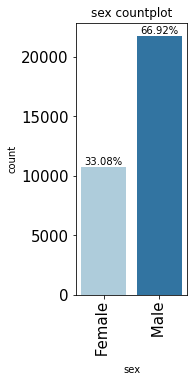

In [41]:
labeled_barplot(data=df, feature='sex', perc= True)

- 66.92% of the people in the data were male
- 33.08% were female

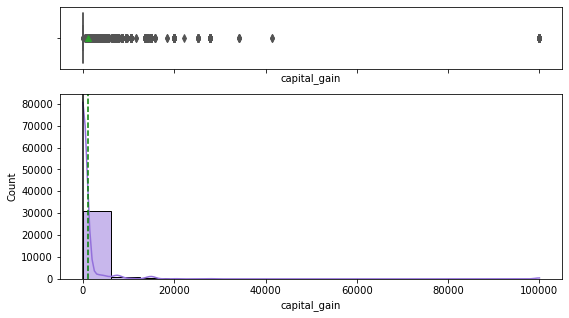

In [42]:
histogram_boxplot(data=df, feature='capital_gain', kde=True)

- majority of the people in the data do not have any recorded capital gain which means that they dont have any form of side income.
- heavy outliers in this feature are shown by the chart, hence the right skew observed.

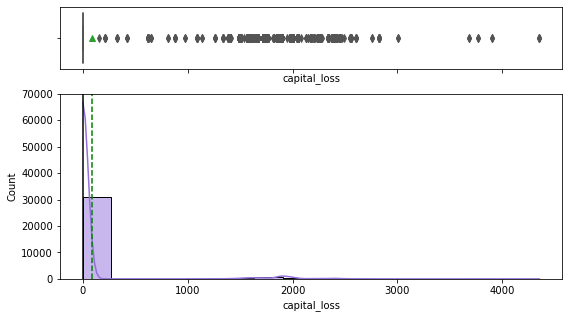

In [43]:
histogram_boxplot(data=df, feature='capital_loss', kde=True)

- majority of the people in the data do not have any recorded capital loss which also indicates that they dont have any form of side income.
- heavy outliers in this feature are shown by the chart, hence the right skew observed.

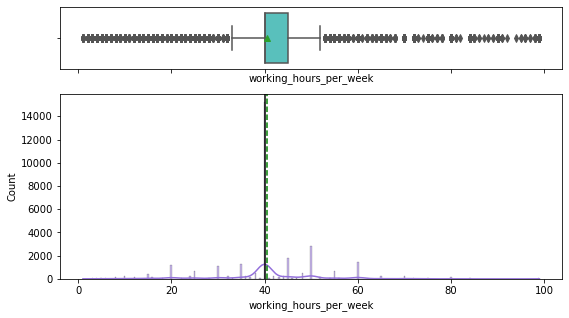

In [44]:
histogram_boxplot(data=df, feature='working_hours_per_week', kde=True)

- the boxplot shows that 50% of the people in dataset work for about 40 hours every week.
- there are a lot of outliers in the data and this is because of the inconsistency in working hours of different people.

In [45]:
df['working_hours_per_week'].mode()

0    40
dtype: int64

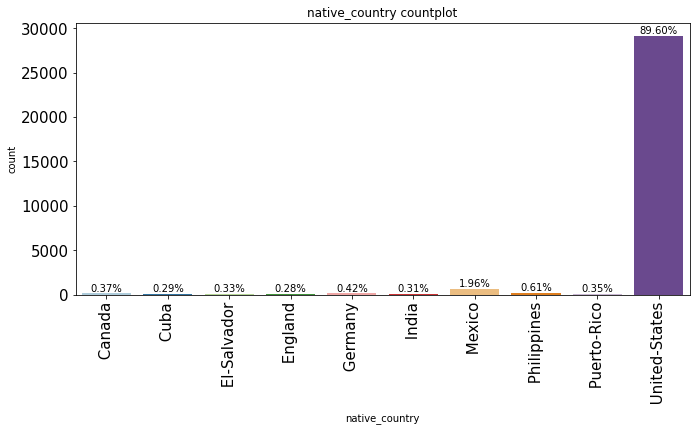

In [46]:
#display the top 10 represented countries in the data
labeled_barplot(data=df, feature='native_country', perc= True, n=10)

- 89.59% of the people are from the united-states.

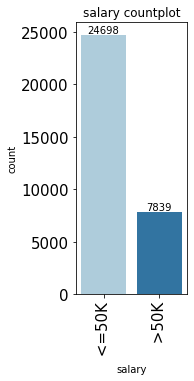

In [47]:
labeled_barplot(data=df, feature='salary', perc= False)

- 7,841 of the people earn above 50K while 24,720 earn at most 50K

## Bivariate Analysis

- First, i want to explore the relationship between the salary range of an individual and HS-grad level of education. this is because it is the mode of the education feature in the data

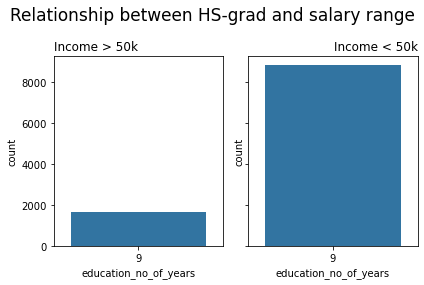

In [48]:
#create a subplot
f1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)

#create a count plot with the subset of HS-graduates(9 years of education) earning above 50k. 
sns.countplot(data=df.query("salary == ' >50K' & education == ' HS-grad'"), x='education_no_of_years',ax=ax1)

#create a count plot with the subset of HS-graduates(9 years of education) earning at most 50k. 
sns.countplot(data=df.query("salary == ' <=50K' & education == ' HS-grad'"), x='education_no_of_years', ax=ax2)

#set the title of the figure
plt.suptitle("Relationship between HS-grad and salary range", fontsize=17)

#locations
locs = ['left', 'right']
#axes
axs = [ax1, ax2]
for ax, loc in zip(axs, locs):
#set the titles at different parts of the plot
    if loc == 'left':
        ax.set_title('Income > 50k', loc=loc)
    else:
        ax.set_title('Income < 50k', loc=loc)

#pad the plot
plt.tight_layout()
plt.show()

- this shows that many of the people that spent 9years educating themselves(HS-grads) earn 50K at most.


now i want to explore the kind of education that is peculiar to the richer class relative to the other

<Figure size 504x504 with 0 Axes>

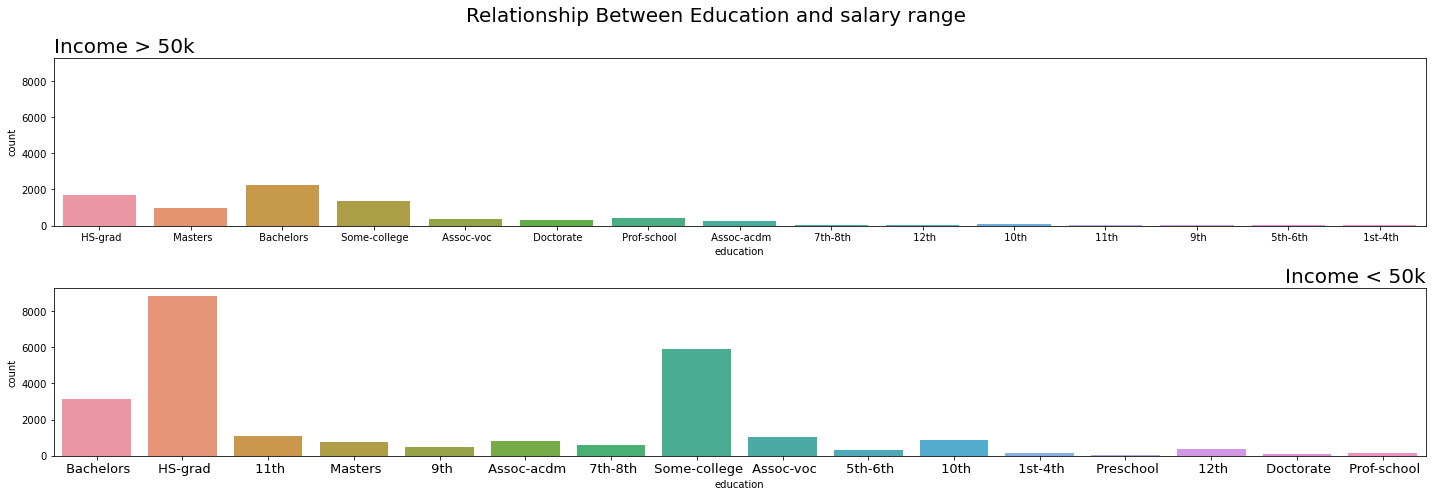

In [49]:
##### set a figure and figszie
plt.figure(figsize= (7,7))
#create a subplot
f1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=True, figsize=(20,7), tight_layout=True)
plt.xticks(fontsize=13)

#create a count plot with the subset of HS-graduates(9 years of education) earning above 50k. 
sns.countplot(data=df.query("salary == ' >50K'"), x = 'education' ,ax=ax1)


#create a count plot with the subset of HS-graduates(9 years of education) earning at most 50k. 
sns.countplot(data=df.query("salary == ' <=50K'"), x = 'education', ax=ax2)

#set the title of the figure
plt.suptitle("Relationship Between Education and salary range", fontsize=20)

#locations
locs = ['left', 'right']
#axes
axs = [ax1, ax2]
for ax, loc in zip(axs, locs):
#set the titles at different parts of the plot
    if loc == 'left':
        ax.set_title('Income > 50k', loc=loc, fontsize=20)
    else:
        ax.set_title('Income < 50k', loc=loc, fontsize=20)

#pad the plot
plt.tight_layout()
plt.show()



- this shows that more people that earn above 50K achieved higher degrees and invariably spent more years educating themselves



In [50]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'working_hours_per_week',
       'native_country', 'salary'],
      dtype='object')

<AxesSubplot:title={'center':'Age Distribution'}, xlabel='age', ylabel='Count'>

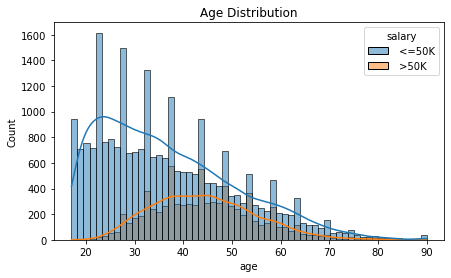

In [51]:
plt.figure(figsize=(7,4))
plt.title("Age Distribution")
sns.histplot(data=df, x='age', hue='salary', kde=True)

- the chart shows the distribution of age of the 2 different categories of salary.
- it is seen from the chart that at younger ages (14 - 45), there are lot of underpriviledged people within this age class compared to the richer subset.
- however, although a similar relationship is observed for the remaining age class but the magnitude is not so much.

## insight
- this means that government should focus more on empowering younger people within the ages 14-45.

In [52]:
df

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


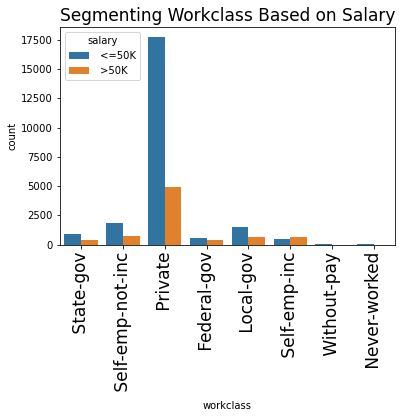

In [53]:
#create a countplot
sns.countplot(data=df, x='workclass', hue='salary')
#rotate the xticks and increase the fontsize
plt.xticks(rotation=90, fontsize=17)
#set the title
plt.title("Segmenting Workclass Based on Salary", fontsize=17)
plt.show()

- private companies are by far the biggest employers based on the data for both the classes of salary
- self-emp-inc is the only workclass that has higher proportion of richer people to underprivlidged.
- federal govt and state govt seem to be the lowest employers from the dataset.
- people without-pay and those who never-worked all earn below 50K

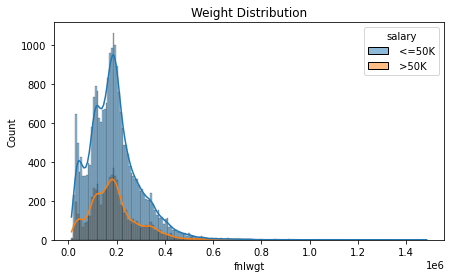

In [54]:
plt.figure(figsize=(7,4))
plt.title("Weight Distribution")
sns.histplot(data=df, x='fnlwgt', hue='salary', kde=True);

- this shows that there are more underpriviledged people but more importantly it depicts that people in both categories have similar weight distribution. which means that some of the rich and poor people have some similar demographic characteristics.
- google search explains that demographic characteristics include: age, race, gender, religion, income, family type etc.

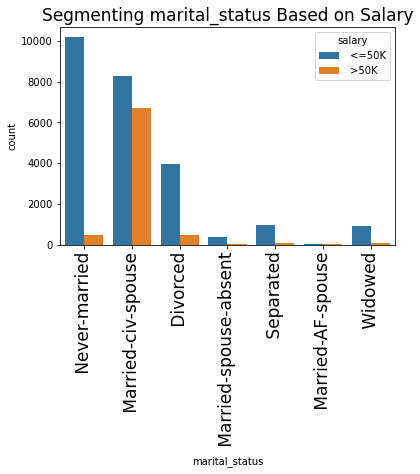

In [55]:
#create a countplot
sns.countplot(data=df, x='marital_status', hue='salary')
#rotate the xticks and increase the fontsize
plt.xticks(rotation=90, fontsize=17)
#set the title
plt.title("Segmenting marital_status Based on Salary", fontsize=17)
plt.show()

- there is a higher proportion of married-civ-spouse people that earn more than 50K annually than those of other categories.
- most people who never married earn at most 50K.

could this be as a result of their low income?

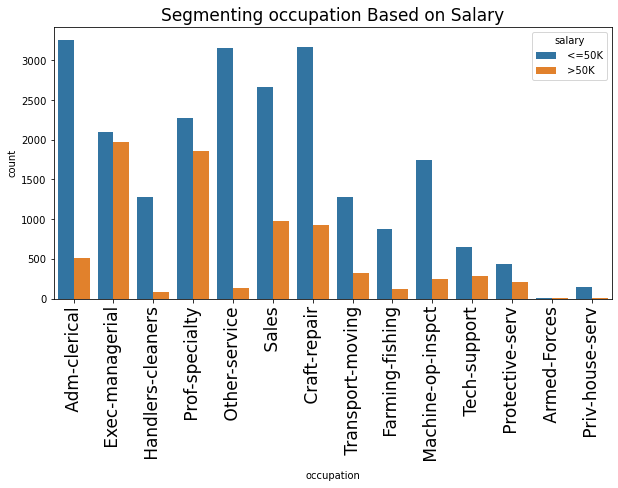

In [56]:
#create a countplot
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='occupation', hue='salary')
#rotate the xticks and increase the fontsize
plt.xticks(rotation=90, fontsize=17)
#set the title
plt.title("Segmenting occupation Based on Salary", fontsize=17)
plt.show()


- as expected, exec-mmanagerial, prof-specialty are occupations that have the highest proportions of people earning above 50K.
- about half of the working as tech-support or protective-serv earn above 50K.
- notice that these occupations are technical or require high level of knowledge

i want to know the level of education reached by people who identified as 'Prof-specialty' and 'Exec-managerial'

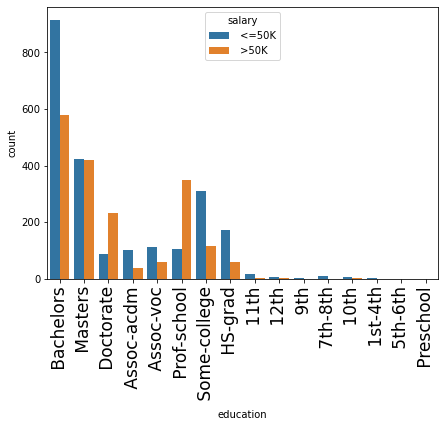

In [57]:
#create a figure
plt.figure(figsize=(7,5))

#countplot of prof-specialist based on their education and categorized by salary
sns.countplot(data=df.query("occupation == ' Prof-specialty'"), x='education', hue='salary')
#font size and rotation of x labels
plt.xticks(rotation=90, fontsize=17)
plt.show()


- this shows that most Profession specialists (prof-specialty), only had bachelors degree.
- there is almost an equal number of specialist with masters that earn above adn below 50K
- there are specialist that earn above 50K that have a doctorate degree.
- more importantly, there is a proportion of HS-grad that were able to become specialist and earn above 50K.



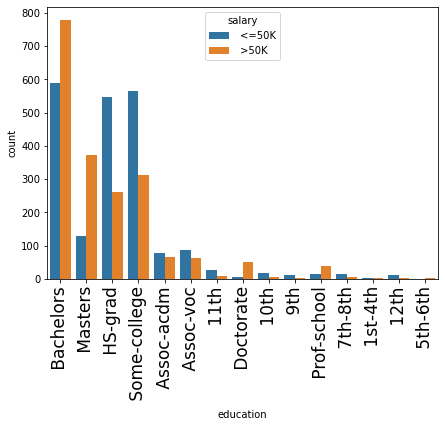

In [58]:
plt.figure(figsize=(7,5))
sns.countplot(data=df.query("occupation == ' Exec-managerial'"), x='education', hue='salary')
plt.xticks(rotation=90, fontsize=17)
plt.show()


- based on the data, more executives with bachelors and masters earn more than 50K
- about half of the population of executives with HS-grad earn more than 50K.
- higher education generally favours more income.

## insight
- given that majority of the population were high school graduates. Encouraging them to learn a specilaized course aside formal education could increase their chances of earning higher.

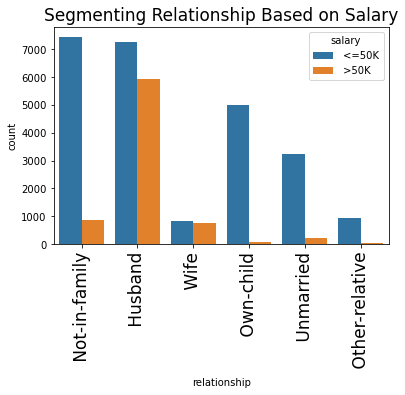

In [59]:
#create a countplot
sns.countplot(data=df, x='relationship', hue='salary')
#rotate the xticks and increase the fontsize
plt.xticks(rotation=90, fontsize=17)
#set the title
plt.title("Segmenting Relationship Based on Salary", fontsize=17)
plt.show()

- this shows that there is a higher ratio value between wives that earn above 50K to wives that earn below 50K than all other subcategories. this means that based on the data, close to half of the people that identfied as wives earn above 50K.

- however in terms of numbers, more husbands earn above 50K than other categories.
- more importantly, people who own a child mostly earn no more than 50K.  this proportion seems to be lower than people not-in-family and unmarried people that earn above 50k. this relationship could suggest that there is a factor responsible for people who have a baby to feed to earn below 50K. could it be as a result of lower amount of work time? or extra expenses accrued from child's living expenses?

<AxesSubplot:xlabel='working_hours_per_week', ylabel='Count'>

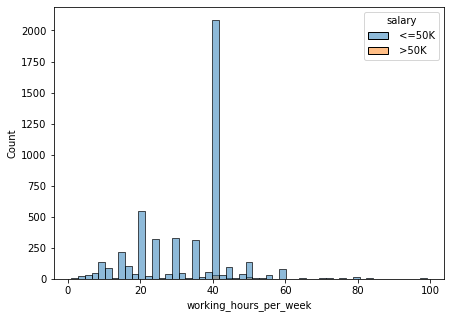

In [60]:
plt.figure(figsize=(7,5))

sns.histplot(data=df.query("relationship == ' Own-child'"),  x='working_hours_per_week', hue='salary')

- this shows that most of the people that own a child are able to work for 40hours. however,a smaller number of them are unable to exceed 40hours.

#
how does this development affect their income?

<AxesSubplot:xlabel='working_hours_per_week', ylabel='Count'>

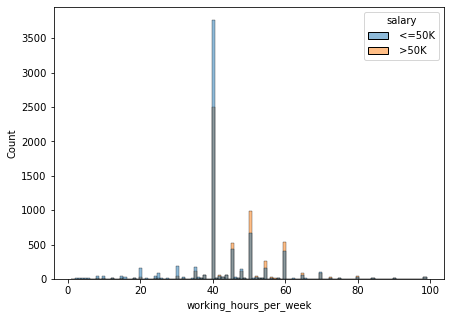

In [61]:
plt.figure(figsize=(7,5))

sns.histplot(data=df.query("relationship == ' Husband'"),  x='working_hours_per_week', hue='salary')

- this shows that Husbands are able to work for more than 40 hours and it is mostly those people that work more than 40 hours that earn above 50K

<AxesSubplot:xlabel='working_hours_per_week', ylabel='Count'>

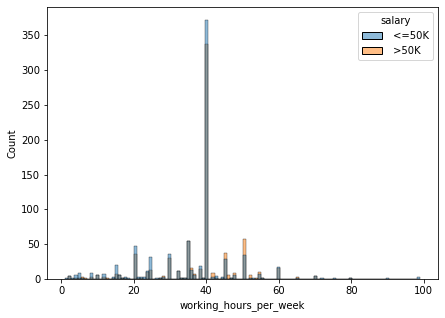

In [62]:
plt.figure(figsize=(7,5))

sns.histplot(data=df.query("relationship == ' Wife'"),  x='working_hours_per_week', hue='salary')

- a similar pattern is also observed here that sees some wives being able to work more tham 40hours and higher proportion of them are able to earn above 50K.
- however, some wives earn above 50K despite working lesser than 40hours

## Insight
- the social policy by the government should assist those people with children by giving money reliefs to assist the family or creating new care giver jobs for the unemployed people under the government's payroll such that the fees to hire a care giver becomes subsidized by the government. Due to this people with child may be able to work more and earn higher than they do.

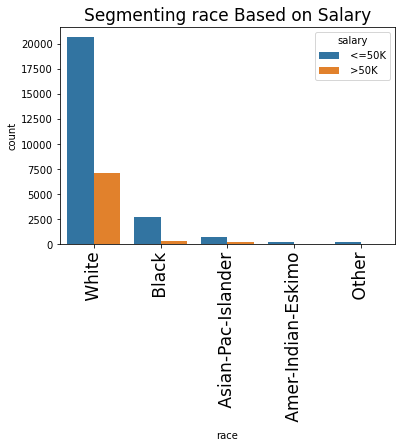

In [63]:
#create a countplot
sns.countplot(data=df, x='race', hue='salary')
#rotate the xticks and increase the fontsize
plt.xticks(rotation=90, fontsize=17)
#set the title
plt.title("Segmenting race Based on Salary", fontsize=17)
plt.show()

- based on the data, it shows that more proportion of white people earn above 50k

## insight
- Government should release social policy that improves the racial blend in organization's employment schemes. this means that the policy should mandate organizations to develop a workspace of people from different cultural background by employing other races than whites

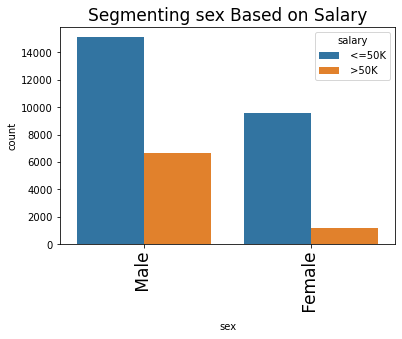

In [64]:
#create a countplot
sns.countplot(data=df, x='sex', hue='salary')
#rotate the xticks and increase the fontsize
plt.xticks(rotation=90, fontsize=17)
#set the title
plt.title("Segmenting sex Based on Salary", fontsize=17)
plt.show()

- this shows that althought there are more men in the data, men generally earns more than women.
could this mean the presence of gender-base bias?

## insight
- the government could put effort in empowering more women in the society.

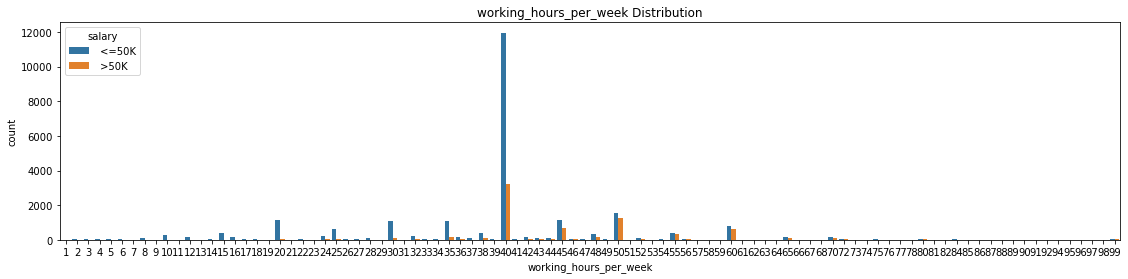

In [65]:
plt.figure(figsize=(19,4))
plt.title("working_hours_per_week Distribution")
sns.countplot(data=df, x='working_hours_per_week', hue='salary');

- this shows that the higher the working hours, the higher the salary the person receives

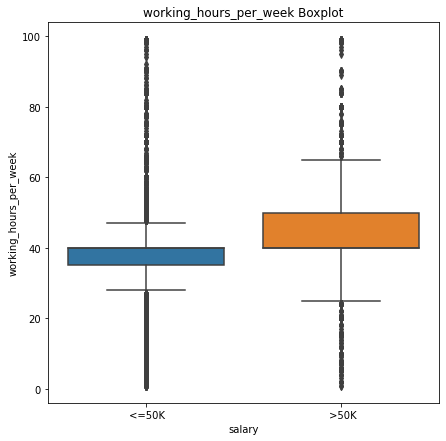

In [66]:
plt.figure(figsize=(7,7))
plt.title("working_hours_per_week Boxplot")
sns.boxplot(data=df, y='working_hours_per_week',x='salary');

- the plots shows that 75% of people that earn 50K at most work for a maximim of 40 hours weekly.
- there are people who work close to 100 hours yet earn below 50K.
- in general, 50% of the people (people within the 25th and 75th percentile) that earn above 50K work more than 40hours weekly.
- in both categories, there are many outliers

### correlation plot

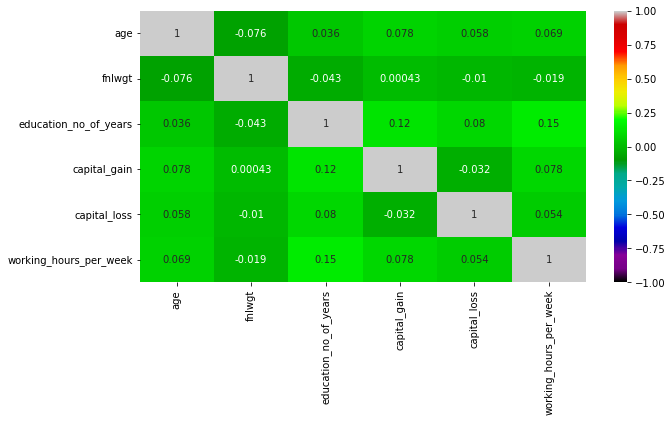

In [67]:
#select numerical columns
num_col = df.select_dtypes(include='number')

#set the figure size
plt.figure(figsize=(10,5))
#plot the correlation plot using a heatmap
sns.heatmap(data=num_col.corr(), vmax=1, vmin=-1, annot=True, cmap='nipy_spectral')
plt.show()


- this suggests that all the variables are approximately independent of each other as theri correlation values are closer to zero. this satisfies one of the assumption of logistic regression.

# EDA SUMMARY

- there are 32,561 rows and 15 columns in the data
- Some missing values were misrepresented with ' ?' and this was replaced to nan
- each values in the categorical columsn all have leading white spaces
- there are lot of underpriviledged younger PEOPLE from ages (14 - 45) compared to the richer subset.
- the federal government is the lowest employer of power
- self-emp-inc  is the only workclass category that has higher proportion of richer people to poor people.
- exec-managerial postions and prof-specialty are positions that most of the people that earn above 50K occupy.
- in the entire armed forces, only 1 person earn above 50K annually and this person has investment, a masters degree and is married.
- people who specialize in technical skills or jobs that require high level knowledge earn more.
- people who work in private insitutions and Self-emp-not-inc are depicted to be a type of businesses that most privilege people are in. however, there are a number of people earning below 50k that still own or work in a private business.
- most people who earn above 50K have spent 13years in school while people who are without pay and have never worked have lesser number of years.


# INSIGHTS
- government should be adviced to create alternative investment opportunities or ammend fiscal and monetary policies that makes it easier for people to invest securely and maximize gains.
- Government should consider passing bills that will increase the salaries of workers under the local, state and federal government
- create welcoming business environment for people to venture into self-emp-inc type of businesses because this is the only workclass that has higher proportion of richer people to poor people.
- government could increase the minimum wage of employed people and mandate private institutions to comply.
- the social policy should carter for the military officers. it should sensitize them on investment opportunities.
- it should also create more study opportunities for officers that want to further their studies.
- social policy should augment efforts channelled at educating the less priviledged such as scholarship opportunities, study grants etc. this could breach the knowledge gap
- government should focus more on empowering younger people within the ages 14-45.
- the federal government should aim to employ more people.
- majority of the population were high school graduates. Encouraging them to learn a specilaized course aside formal education could increase their chances of earning higher.
- the social policy by the government should assist those people with children by giving money reliefs to assist the family or creating new care giver jobs for the unemployed people under the government's payroll such that the fees to hire a care giver becomes subsidized by the government. Due to this people with child may be able to work more and earn higher than they do.
- Government should release social policy that improves the racial blend in organization's employment schemes. this means that the policy should mandate organizations to develop a workspace of people from different cultural background by employing other races than whites
- the government could put effort in empowering more women in the society.


## Data Cleaning

### remove leading spaces in the values of all the categorical columns

In [68]:
# display the value count for each categorical features
#subset the categorical columns
cat_cols = df.select_dtypes(include="object")

#itirate over the columns in cat_cols and return the value count
for col in cat_cols:
    print(col.upper()) #print the column name in capital letters
    print(df[col].unique())  #display the unique item of each subcategory
    print('-'* 10)  # separate each of them

WORKCLASS
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 nan ' Self-emp-inc' ' Without-pay' ' Never-worked']
----------
EDUCATION
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
----------
MARITAL_STATUS
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
----------
OCCUPATION
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' nan
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
----------
RELATIONSHIP
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
----------
RACE
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
----------
SEX
[' Male' ' Female'

- this shows that the values of each column have whitespace preceeding them.

In [69]:
def whitespace_remover(val):
    """
    removes whitespaces in val if val is a string.
    
    """
    if isinstance(val, float): #if val is a null value
        pass
    else:  #if val is not a null value
        val = val.strip() #strip all starting and trailing whitespaces
        return val  #return the new val

def apply_whitespace_remover(data, cat_col):
    """
    apply the whitespace remover on the categorical column of the dataset
    data: dataframe
    cat_col: categorical columns
    """
    for cols in cat_col:  #for each categorical column in dataset
        data[cols] = data[cols].apply(whitespace_remover)  #apply the function
    return data   #return the dataframe

In [70]:
apply_whitespace_remover(df, cat_cols)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [71]:
# display the value count for each categorical features
#subset the categorical columns
cat_cols = df.select_dtypes(include="object")

#itirate over the columns in cat_cols and return the value count
for col in cat_cols:
    print(col.upper()) #print the column name in capital letters
    print(df[col].unique())  #display the unique item of each subcategory
    print('-'* 10)  # separate each of them

WORKCLASS
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' None
 'Self-emp-inc' 'Without-pay' 'Never-worked']
----------
EDUCATION
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
----------
MARITAL_STATUS
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
----------
OCCUPATION
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' None
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
----------
RELATIONSHIP
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
----------
RACE
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
----------
SEX
['Male' 'Female']
----------
NATIVE_COUNTRY
['United-States' 'Cuba' 'Jama

In [72]:
#check for missing values
df.isnull().sum()

age                          0
workclass                 1836
fnlwgt                       0
education                    0
education_no_of_years        0
marital_status               0
occupation                1843
relationship                 0
race                         0
sex                          0
capital_gain                 0
capital_loss                 0
working_hours_per_week       0
native_country             582
salary                       0
dtype: int64

### cleaning workclass

In [73]:
# what is the number of people with missing values in workclass and occupation columns
len(df[(df["workclass"].isnull()) & (df["occupation"].isnull())])

1836

- this means that 1,836 missing values in workclass have missing values in occupation as well. therefore performing a groupfill opertaion may not be entirely accurate.
- hence i will drop them

In [74]:
#replace the missing values in workclass
df = df.dropna(subset=["workclass", 'occupation'])

In [75]:
df.isnull().sum()

age                         0
workclass                   0
fnlwgt                      0
education                   0
education_no_of_years       0
marital_status              0
occupation                  0
relationship                0
race                        0
sex                         0
capital_gain                0
capital_loss                0
working_hours_per_week      0
native_country            555
salary                      0
dtype: int64

In [76]:
#check the categories of workclass
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

### cleaning education

In [77]:
df.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', 'Preschool', '12th', '1st-4th'], dtype=object)

- i will replace the values from 1st - 12th grade with lower_grade. this new category will serve as a group for people that only completed any of the lower grade in school. the goal is to reduce the categories

In [78]:
# l1 = ['1st-4th','5th-6th','7th-8th','9th','10th','11th','12th' ]
# for i in l1:
#     df = df.replace({'education': { i : 'lower_grade'}})

In [79]:
listed = df.education.unique().tolist()
listed

['Bachelors',
 'HS-grad',
 '11th',
 'Masters',
 '9th',
 'Some-college',
 'Assoc-acdm',
 'Assoc-voc',
 '7th-8th',
 'Doctorate',
 'Prof-school',
 '5th-6th',
 '10th',
 'Preschool',
 '12th',
 '1st-4th']

- in an attempt at reducing the number of columns, i want to see if this column is explained by  the number of years of eductaion column. This is because the higher the years of education, the higher the degree.
- i want to know the min and max of the number of years for every education subcategory to see if it aligns accross the data

In [80]:
for i in listed:
    print(i.upper())
    print(df['education_no_of_years'][df['education'] == i].min())
    print(df['education_no_of_years'][df['education'] == i].max())

BACHELORS
13
13
HS-GRAD
9
9
11TH
7
7
MASTERS
14
14
9TH
5
5
SOME-COLLEGE
10
10
ASSOC-ACDM
12
12
ASSOC-VOC
11
11
7TH-8TH
4
4
DOCTORATE
16
16
PROF-SCHOOL
15
15
5TH-6TH
3
3
10TH
6
6
PRESCHOOL
1
1
12TH
8
8
1ST-4TH
2
2


- this shows that the education_number_of_years column perfectly explains the education columns because the minimum and the maximum values are consistent accross the data.

- hence, when building the model, it can be dropped.

In [81]:
#drop the education column

df = df.drop(labels='education', axis=1)

### cleaning marital status

In [82]:
#unique values of marital_status column
df.marital_status.unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

- except widowed people, other people that are separated in one way or another from their spouse are either Divorced', 'Married-spouse-absent', 'Separated'. 
- 'Married-civ-spouse' and 'Married-AF-spouse' are married and together with their spouse.
- 'Never-married' were never married

i want to see if a similar relationship exist between these sub-categories based on their salary

In [83]:
#list1 contains the column name for people separated from their spouses 
list1 = ['Divorced', 'Married-spouse-absent', 'Separated']

for i in list1:
    print(i.upper()) #print the subcategory name
    #group the subset of each separated people by their salary and show the value count of their relationship
    print(df[df['marital_status'] == i].groupby('salary')['relationship'].value_counts())
    print('-'*10)


DIVORCED
salary  relationship  
<=50K   Not-in-family     1985
        Unmarried         1420
        Own-child          295
        Other-relative      99
>50K    Not-in-family      304
        Unmarried          133
        Own-child           14
        Other-relative       6
Name: relationship, dtype: int64
----------
MARRIED-SPOUSE-ABSENT
salary  relationship  
<=50K   Not-in-family     170
        Unmarried         116
        Own-child          42
        Other-relative     28
>50K    Not-in-family      24
        Unmarried           5
        Other-relative      2
        Own-child           2
Name: relationship, dtype: int64
----------
SEPARATED
salary  relationship  
<=50K   Unmarried         403
        Not-in-family     349
        Own-child          90
        Other-relative     51
>50K    Not-in-family      45
        Unmarried          19
        Other-relative      2
Name: relationship, dtype: int64
----------


- this shows that a higher proportion of people who are separated from their spouses seem to earn no more than 50k.


In [84]:
#list1 contains the column name for people still married to their spouses 
list2 = ['Married-civ-spouse', 'Married-AF-spouse']

for i in list1:
    print(i.upper()) #print the subcategory name
    #group the subset of each married people by their salary and show the value count of their relationship
    print(df[df['marital_status'] == i].groupby('salary')['relationship'].value_counts())
    print('-'*10)

DIVORCED
salary  relationship  
<=50K   Not-in-family     1985
        Unmarried         1420
        Own-child          295
        Other-relative      99
>50K    Not-in-family      304
        Unmarried          133
        Own-child           14
        Other-relative       6
Name: relationship, dtype: int64
----------
MARRIED-SPOUSE-ABSENT
salary  relationship  
<=50K   Not-in-family     170
        Unmarried         116
        Own-child          42
        Other-relative     28
>50K    Not-in-family      24
        Unmarried           5
        Other-relative      2
        Own-child           2
Name: relationship, dtype: int64
----------
SEPARATED
salary  relationship  
<=50K   Unmarried         403
        Not-in-family     349
        Own-child          90
        Other-relative     51
>50K    Not-in-family      45
        Unmarried          19
        Other-relative      2
Name: relationship, dtype: int64
----------


- this shows that compared to other categories, higher number of married people earn above 50K.

- hence, i will categorize all married people as 'Married' and all separated people as 'Separated'. 

In [85]:
for i in list1: #for each value for separated people
    df = df.replace({'marital_status': { i : 'Separated'}})#replace the value with separated in the marital_status column

for i in list2:  #for each value for married people
    df = df.replace({'marital_status': { i : 'Married'}}) #replace the value with married in the marital_status

#check the unique values
df.marital_status.unique()

array(['Never-married', 'Married', 'Separated', 'Widowed'], dtype=object)

### native_country

In [86]:
df.native_country.value_counts()

United-States                 27487
Mexico                          606
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        61
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France                      

- the number of subcategories in this column is much. so i would put all countries less than 80 counts as others.
- the missing values in native country will most likely not be accurately filled by grouping the data based on race. so i will drop the missing values.

In [87]:
df = df.dropna(subset=['native_country'])

df.reset_index(drop=True, inplace=True)

In [88]:
#threshold  at 80
threshold = 80

#value count of country
count = df.native_country.value_counts()

#subset of the countries with more counts above the threshold
country_list_threshold = count[count >= threshold].index.to_list()


In [89]:

country = []
#for each row in the data
for i in range(df.shape[0]):
    #text is the value of native country for that particular row
    text = df['native_country'].values[i]
    flag = 0 #falg variable
    if text in country_list_threshold: #if text is inside the country_list_threshold
        country.append(text)  #append it to the country list
        flag = 1
    else:
        country.append('others') #else append others in its place

#the length of country will be thesame as the lenght of the df['native_country']

len(df['native_country']) == len(country)

True

In [90]:
df['native_country'].values

array(['United-States', 'United-States', 'United-States', ...,
       'United-States', 'United-States', 'United-States'], dtype=object)

In [91]:
from collections import Counter

In [92]:
Counter(country)

Counter({'United-States': 27487,
         'Cuba': 92,
         'Jamaica': 80,
         'India': 100,
         'Mexico': 606,
         'Puerto-Rico': 109,
         'others': 1056,
         'England': 86,
         'Canada': 107,
         'Germany': 128,
         'Philippines': 188,
         'El-Salvador': 100})

In [93]:
df['country'] = [item for item in country]

In [94]:
df['country']

0        United-States
1        United-States
2        United-States
3        United-States
4                 Cuba
             ...      
30134    United-States
30135    United-States
30136    United-States
30137    United-States
30138    United-States
Name: country, Length: 30139, dtype: object

In [95]:
df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    0
country                   0
dtype: int64

In [96]:
#drop the native_country column
df = df.drop(['native_country'], axis=1)

### Outlier detection and treatment


- logistics regression has an assumption that the model should not have outliers. Generally, it results in poor model performance. but the capital_loss and capital_gain have important values far greater than their mode which is zero and will hence act as outliers.

- based on the EDA, there are 3 categories that can be imagined for capital_gain and capital_loss
- 1. people without capital_gain
- 2. people with capital_gain but still earn 50K at most
- 3. people with capital-gain but earn higher than 50K

- i want to know the minimum and maximum value of capital_gain and capital_loss for the subset of 2 and 3 above.

In [97]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education_no_of_years', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'working_hours_per_week', 'salary', 'country'],
      dtype='object')

In [98]:
#subset of data with no capital gain and earns 50k at most
df.query("capital_gain == 0 & salary == '<=50K'")['capital_gain'].sum()

0

In [99]:
#maximum earning of subset of people with some capital gain and earns 50k at most
df.query("capital_gain > 0 & salary == '<=50K'")['capital_gain'].max()

41310

- this means that 41,310 is the maximum earning of someone or some people that has investment but still underpriviledged

In [100]:
#minimum earning of subset of people with some capital gain and earns more than 50k 
df.query("capital_gain > 0 & salary == '>50K'")['capital_gain'].min()


3103

- this means that 3,103 is the minimum capital gain of people that earnsabove 50k

In [101]:
#maximum earning of subset of people with some capital gain and earns more than 50k 
df.query("capital_gain > 0 & salary == '>50K'")['capital_gain'].max()

99999

- this means that 99,999 is the maximum capital gain of people that earnsabove 50k.

- it is clearer as to how vast the distance these values are from zero. and i think classifying them into the 3 categories would be better.
- class 0: people without capital_gain
- class 1: people with capital_gain but still earn 50K at most
- class 2: people with capital-gain but earn higher than 50K

- i will apply thesame concept to the capital_loss since similar relationship was seen during the EDA

In [102]:
listed = []
for i in range(df.shape[0]):  #for each row in the data
    capital = df['capital_gain'].values[i]  
    salary = df['salary'].values[i]
    if capital == 0:  #if capital_gain is zero
        listed.append('class 0') #append class 0 to listed
    elif capital > 0 and salary == '<=50K': #if capital_gain > zero and salary <=50k
        listed.append('class 1') #append class 1 to listed
    elif capital > 0 and salary == '>50K': #if capital_gain is > zero and salary > 50k
        listed.append('class 2') #append class 2 to listed
listed

#create a new column in the dataframe whose value will be each value for listed
df['capital_profit'] = [item for item in listed]  

df['capital_profit'] = df['capital_profit'].astype('category')

In [103]:
df['capital_profit'].dtype

CategoricalDtype(categories=['class 0', 'class 1', 'class 2'], ordered=False)

In [104]:
# same thing to the capital_loss column
listed = []
for i in range(df.shape[0]):
    capital = df['capital_loss'].values[i]
    salary = df['salary'].values[i]
    if capital == 0:
        listed.append('class 0')
    elif capital > 0 and salary == '<=50K':
        listed.append('class 1')
    elif capital > 0 and salary == '>50K':
        listed.append('class 2')
listed

df['capital_loss'] = [item for item in listed]

df['capital_loss'] = df['capital_loss'].astype('category')



In [105]:
df['capital_loss'].dtype

CategoricalDtype(categories=['class 0', 'class 1', 'class 2'], ordered=False)

In [106]:
from collections import Counter

Counter(df['capital_loss'])

Counter({'class 0': 28712, 'class 1': 690, 'class 2': 737})

In [107]:
Counter(df['capital_profit'])

Counter({'class 1': 943, 'class 0': 27601, 'class 2': 1595})

In [108]:
df = df.drop('capital_gain', axis=1)

In [109]:
def check_outliers(df, numeric_cols=None):
    """
    check the presence of outliers
    df: dataframe
    numeric cols: numerical d
    """
    plt.figure(figsize=(10,15))
    for ind,col in enumerate(numeric_cols):
        plt.subplot(3,2, ind+1)
        plt.boxplot(df[col])
        plt.title(col)
    
def remove_outlier(df, col):
    """remove all outliers in features
    df: dataframe
    col: feature
    """
    
    lower = df[col].quantile(0.25)
    upper = df[col].quantile(0.75)
    
    #inter quartile range
    iqr = upper - lower
    
    #upper amd lower clip
    upper_clip = upper + 1.5 * iqr
    lower_clip = lower - 1.5 * iqr
    #clip the lower and upper range
    df[col] = np.clip(df[col], lower_clip, upper_clip)
    return df

def apply_remove_outlier(df, num_cols):
    """
    apply remove outlier fn 
    df: dataframe
    num_cols: numeric cols
    """
    for cols in num_cols:
        remove_outlier(df, cols)
    return df

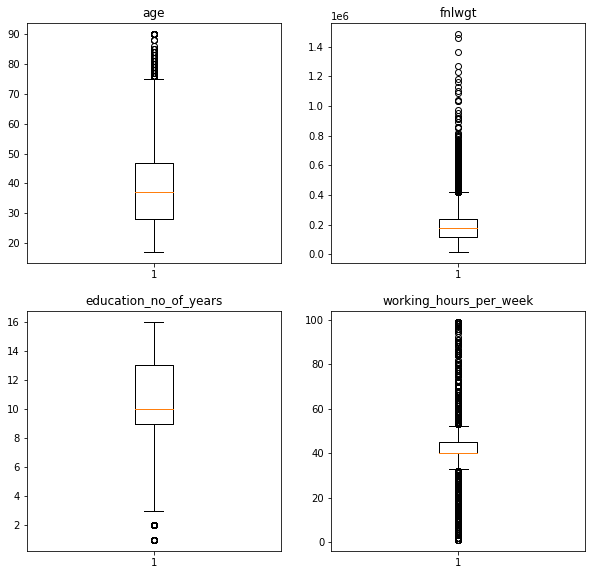

In [110]:
#define numerical columns of the dataset
num_col = df.select_dtypes(include='number')

check_outliers(df, num_col)

In [111]:
apply_remove_outlier(df, num_col)

,age,workclass,fnlwgt,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_loss,working_hours_per_week,salary,country,capital_profit
0,39.0,State-gov,77516.0,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,class 0,40.0,<=50K,United-States,class 1
1,50.0,Self-emp-not-inc,83311.0,13.0,Married,Exec-managerial,Husband,White,Male,class 0,32.5,<=50K,United-States,class 0
2,38.0,Private,215646.0,9.0,Separated,Handlers-cleaners,Not-in-family,White,Male,class 0,40.0,<=50K,United-States,class 0
3,53.0,Private,234721.0,7.0,Married,Handlers-cleaners,Husband,Black,Male,class 0,40.0,<=50K,United-States,class 0
4,28.0,Private,338409.0,13.0,Married,Prof-specialty,Wife,Black,Female,class 0,40.0,<=50K,Cuba,class 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,27.0,Private,257302.0,12.0,Married,Tech-support,Wife,White,Female,class 0,38.0,<=50K,United-States,class 0
30135,40.0,Private,154374.0,9.0,Married,Machine-op-inspct,Husband,White,Male,class 0,40.0,>50K,United-States,class 0
30136,58.0,Private,151910.0,9.0,Widowed,Adm-clerical,Unmarried,White,Female,class 0,40.0,<=50K,United-States,class 0
30137,22.0,Private,201490.0,9.0,Never-married,Adm-clerical,Own-child,White,Male,class 0,32.5,<=50K,United-States,class 0


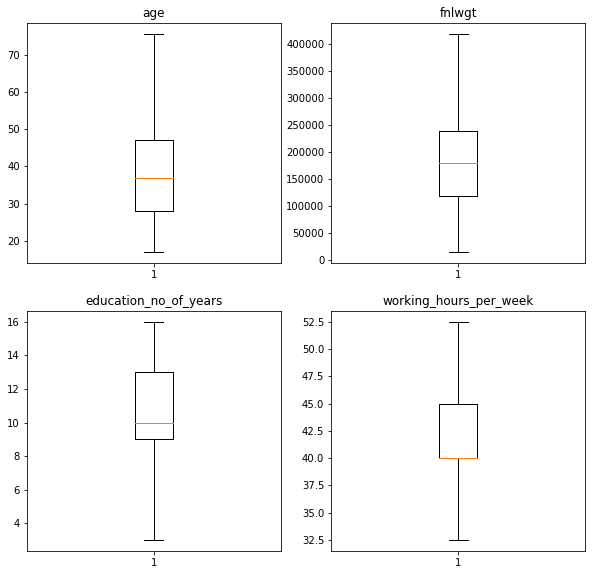

In [112]:
check_outliers(df, num_col)

In [113]:
df

,age,workclass,fnlwgt,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_loss,working_hours_per_week,salary,country,capital_profit
0,39.0,State-gov,77516.0,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,class 0,40.0,<=50K,United-States,class 1
1,50.0,Self-emp-not-inc,83311.0,13.0,Married,Exec-managerial,Husband,White,Male,class 0,32.5,<=50K,United-States,class 0
2,38.0,Private,215646.0,9.0,Separated,Handlers-cleaners,Not-in-family,White,Male,class 0,40.0,<=50K,United-States,class 0
3,53.0,Private,234721.0,7.0,Married,Handlers-cleaners,Husband,Black,Male,class 0,40.0,<=50K,United-States,class 0
4,28.0,Private,338409.0,13.0,Married,Prof-specialty,Wife,Black,Female,class 0,40.0,<=50K,Cuba,class 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,27.0,Private,257302.0,12.0,Married,Tech-support,Wife,White,Female,class 0,38.0,<=50K,United-States,class 0
30135,40.0,Private,154374.0,9.0,Married,Machine-op-inspct,Husband,White,Male,class 0,40.0,>50K,United-States,class 0
30136,58.0,Private,151910.0,9.0,Widowed,Adm-clerical,Unmarried,White,Female,class 0,40.0,<=50K,United-States,class 0
30137,22.0,Private,201490.0,9.0,Never-married,Adm-clerical,Own-child,White,Male,class 0,32.5,<=50K,United-States,class 0


In [114]:
df1 = df.copy()

df1.shape

(30139, 14)

- the final modeling data has 30,139 rows and 14 columns

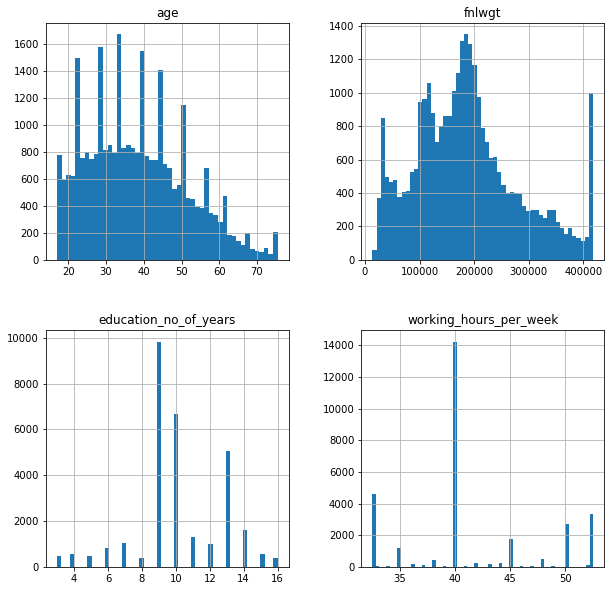

In [115]:
cols = num_col.columns.to_list()
ax = df1.hist(column=cols,figsize=(10,10), bins='auto' )

- this shows that education_no_of_years and working_hours are like discrete quatntities.
- age is slightly skewed

## Data Modeling Process

### import relevant libraries

In [116]:
from sklearn.linear_model import LogisticRegression #for logistics regression
from sklearn.preprocessing import StandardScaler #for standardizing the values
from sklearn.metrics import (accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve,f1_score,
                             ConfusionMatrixDisplay, confusion_matrix)#evaluating metrics
from sklearn.model_selection import train_test_split  #for splitting the datasets

- create dummy variables

In [117]:
#first encode the target
from sklearn.preprocessing import LabelEncoder



In [118]:
# #create an instance 
# lc = LabelEncoder()

# #fit to the target
# lc.fit(['<=50K', '>50K'])

# #check how the values are transformed
# lc.transform(['<=50K', '>50K'])

# #transform the target column
# df1['salary'] = lc.transform(df1['salary'])

In [119]:
df1['salary'] = df1['salary'].replace({'<=50K': 1, '>50K':0})

- salary values '<=50k' will classified as 1
- salary values '>50k' will be classified as 0

In [120]:
df1['salary'].dtype

dtype('int64')

In [121]:
#create dummy values for features
model_data = pd.get_dummies(data=df1, drop_first=True)

In [122]:
#new shape of model data
model_data.shape

(30139, 52)

- there are 52 columns nd 30,139 rows in the data to be used for modelling

In [123]:
#define target 
y = model_data['salary']

#define features
X = model_data.drop(['salary'], axis = 1)

In [124]:
#split the data to train, validation and test sets in ratio 60:20:20 respectively
x_train_r,x_test, y_train_r, y_test = train_test_split(X, y, test_size=0.2, random_state=0,
                                                      stratify=y)

x_train, x_val, y_train, y_val = train_test_split(x_train_r,y_train_r, test_size=0.2, random_state=0,
                                                 stratify=y_train_r)

In [125]:
#scale the features of the train and validation set

scaler = StandardScaler()

#scale the train
x_train_sc = scaler.fit_transform(x_train)

#transform the test and val
x_val_sc = scaler.transform(x_val)
x_test_sc = scaler.transform(x_test)

## model development

In [126]:
# define a fn to train a model and compute train accuracy

def model_trainer(algorithm, X, y):
    """
    trains the model with given parameters
    algorithm: algorithm
    X: x_train scaled
    y = target
    """
    trained_model = algorithm.fit(X, y) #train the algorithm
    
    prediction = trained_model.predict(X)  #making prediction on the train data
    
    acc = accuracy_score(y, prediction)  #make predictions
    #print(f"train accuracy : {acc}")  #print accuracy
    print("train accuracy : {:.3f}".format(acc))
    return trained_model   #return trained model
#define another pipeline to evaluate the model and compute metrics on test data

def model_evaluator(model, X, y, threshold = 0.5, probability = False):
    """
    evaluate the model based on it is metrics
    model : trained model
    X : test data scaled or scaled validation data
    y : test target
    threshold: float, describes the degree of strictness with probability. any probability < threshold equals to 0
    probability : boolean, if True predict probability of occurence else preidct0 or 1
    """
    
    #make prediction
    #predict probability for each row
    pred_proba = model.predict_proba(X)[:,1]   #subset all the rows of second column
    pred_class = np.round(pred_proba > threshold)  #create a class of either 1 or 0 for each row
    
    #calcilate recall
    recall = recall_score(y, pred_class)
    
    
    #calculate precision
    precision = precision_score(y, pred_class)
    
    #calculate accuracy
    acc = accuracy_score(y, pred_class)
    
    #f1 score
    f1 = f1_score(y, pred_class)
    
    df = pd.DataFrame({"Accuracy" : acc,
                      "Recall" : recall,
                      "Precision" : precision,
                      "f1" : f1}, index = [0])
    #compute confusion matrix
    confusion = confusion_matrix(y, pred_class, labels=[0,1])
    
    #plot confusion matrix
    confusion_display = ConfusionMatrixDisplay(confusion, display_labels=[0,1])
    #plot the matrix
    confusion_display.plot()
    plt.show()
    
    #show the metrics
    return df

def roc(model, X, y):
    """
    display the roc curve
    model : model
    X : test features
    y : test target
    """
    pred = model.predict_proba(X)[:,1]
    auc = roc_auc_score(y, pred)
    fpr, tpr, thre = roc_curve(y, pred)
    
    plt.figure(figsize = (5,5))
    plt.plot(fpr, tpr,marker = 'x', markersize = 7, label=(f"Logistic Regression {auc:.2f}" ))
    plt.plot([0,1],[0,1], "b--")
    plt.xlim(0,1)
    plt.ylim(0,1.05)
    plt.legend(loc = "lower center")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")
    plt.title("ROC - AUC curve")
    plt.suptitle("ROC")
    plt.show()
    
    return thre, tpr, fpr #return the threshold, tpr and fpr

## Logistic Regression

In [127]:
#create an instance of logistics regression
log_reg = LogisticRegression(random_state=0)

In [128]:
#train the algorithm and return the train accuracy score of the model
log_reg_model = model_trainer(algorithm=log_reg, X=x_train_sc, y=y_train)

train accuracy : 0.869


- this means that the model was able to predict 87% of total predictions (both 1 and 0 classes) correctly.
- it means that the total correct predictions relative to the total prediction was 87% and that given a dataset of similar distribution, the model will accurately classify the targets 87% of the time.

In [129]:
y_val.value_counts()

1    3622
0    1201
Name: salary, dtype: int64

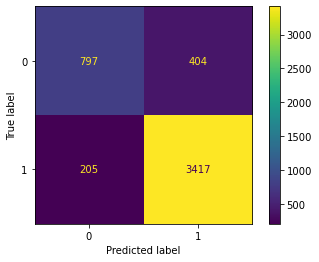

,Accuracy,Recall,Precision,f1
0,0.87373,0.943401,0.894269,0.918178


In [130]:
log_reg_df = model_evaluator(log_reg_model, x_val_sc, y_val)
log_reg_df

### explaining the confusion matrix
- from the validation data, out of 3,622 people that earn below 50K annually (3,417 + 205), the model was able to correctly classify 3,417 as underprivililedged i.e people that earn below 50K, and incorrectly classified 205 people to earn above 50K annually.

- also, based on the validation data, 1,201 people (404 + 797) earn above 50K. However, it predicted 404 of them earn below 50K annually while the remaining 797 people were correctly predicted to earn above 50K annually.

- from the predictions, 1,002 people (205 + 797), that were predicted to earn above 50K only 797 were classified correctly. the remaining 205 underpriviledged people were incorrectly classified as people that earn above 50K
- in a similar manner, out of 3,821 people that were predicted to earn below 50K annually, 3,417 of them truly earned 50k at most however, 404 of the priviledged people were wrongly classified as underpriviledged.

### explaining the metric dataframe
- accuracy:
    - this means that the model was able to predict 87.4% of total predictions (both 1 and 0 classes) correctly.
- Recall:
    - this means that 94.3% of people that earn below 50k in the dataset were correctly classified.
- Precision:
    - this means that 89.4% of the model predictions for people predicted to earn below 50K were correct.
- f1:
    - the f1 score is 0.918

In [131]:
# explaining the coefficients
coefficients = list(log_reg.coef_[0])


In [132]:
coefficients_df = pd.DataFrame(data=[coefficients], columns=[X.columns], index=[0])
coefficients_df

,age,fnlwgt,education_no_of_years,working_hours_per_week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,country_Germany,country_India,country_Jamaica,country_Mexico,country_Philippines,country_Puerto-Rico,country_United-States,country_others,capital_profit_class 1,capital_profit_class 2
0,-0.392516,-0.061716,-0.707371,-0.413324,0.178298,0.260456,0.062145,0.318471,0.172736,0.179751,...,-0.023987,0.042225,-0.016512,0.087017,-0.006444,0.003624,-0.055303,0.024498,1.216503,-2.081331


- age:
    - the coefficient of age feature means that holding all other parameters constant, an increase in the age of an individual, the odds that they earn 50K at most decreases by 0.34. (e*(-0.416) - 1 = -0.34)

- workclass_Private:
    - the coefficient of this feature means that holding all other parameters constant, if someone decides to work in a private institution, the odds that they earn below 50K increases by 0.301. (e*(0.2638) - 1 = 0.301)

## Improving the Model Performance

#### changing the solver and penalty function

'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization
with primal formulation, or no regularization.

- Using the newton-cg solver and L2 regularization

In [133]:
log_reg_ncg = LogisticRegression(solver='newton-cg', random_state=0)

In [134]:
log_reg_ncg_model = model_trainer(log_reg_ncg, x_train_sc, y_train)

train accuracy : 0.869


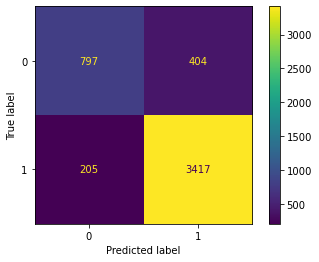

,Accuracy,Recall,Precision,f1
0,0.87373,0.943401,0.894269,0.918178


In [135]:
model_evaluator(log_reg_ncg_model, x_val_sc, y_val)

- this gives the exact same result as using the lbfgs solver

#### using the 'sag' solver and inherent L2 norm regularization

train accuracy : 0.869


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


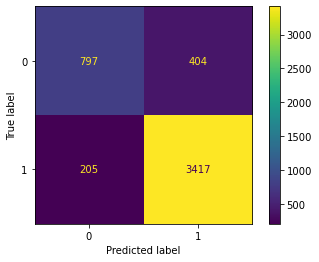

,Accuracy,Recall,Precision,f1
0,0.87373,0.943401,0.894269,0.918178


In [136]:
log_reg_ncg = LogisticRegression(solver='sag', random_state=0)

log_reg_ncg_model = model_trainer(log_reg_ncg, x_train_sc, y_train)

model_evaluator(log_reg_ncg_model, x_val_sc, y_val)

### using the L1 penalty and saga solver

train accuracy : 0.869


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


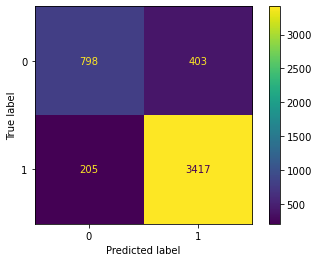

,Accuracy,Recall,Precision,f1
0,0.873937,0.943401,0.894503,0.918302


In [137]:
log_reg_saga = LogisticRegression(penalty='l1', solver='saga', random_state=0)

#train the model
log_reg_saga_model = model_trainer(log_reg_saga, x_train_sc, y_train)
#evaluate the model using the val set and return a dataframe of the metrics
model_evaluator(log_reg_saga_model, x_val_sc, y_val)

- this shows that using an l1 penalty and saga solver slightly improved the accuracy, precision and f1 of the model
- the increase observed in precision means that the model might be slighly better in classifying richer people, since it will decrease the false postives.
- the recall however remained constant.

### using the l2 norm and 'lbfgs' as before, i want to see the perofrmace of the model by tweaking the regularization strength (C)



0.02021839744032572

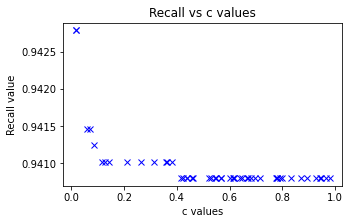

In [138]:
#create different values for c
np.random.seed(0) #for values to remain unchanged
c_val = np.random.rand(10,5).reshape(1,50).flatten()  #create 50 random values for c_val ranging from 0 to 1
c_val

acc_list = []
for c in c_val: #for each value of c in c_val
    #create an instance of logistic regression with varying c values
    model = LogisticRegression(C = c)
    #fit the model
    model.fit(x_train_sc, y_train)
    
    #compute the recall
    pred = model.predict(x_test_sc)
    rec = recall_score(y_test, pred)
    #print(f"accuracy = {acc:.3f} for c values of {c:.2f}")
    #append recall scores into acc_list
    acc_list.append(rec)
    
plt.figure(figsize= (5,3))
plt.plot(c_val, acc_list, 'bx') #plot cvalues against recall values
plt.xlabel("c values")
plt.ylabel("Recall value")
plt.title("Recall vs c values")

#get the optimal index of c values in acc_list
optimal_c_ind = np.argmax(acc_list)
#using its index on c_val, get the optimal values for c
optimal_c = c_val[optimal_c_ind]
optimal_c

- this shows that lower c values (stronger regularization) increases the Recall of the model.
- the optimal value for c selected is 0.0202

## how does this c-value affect the accuracy?

Text(0.5, 1.0, 'accuracy vs c values')

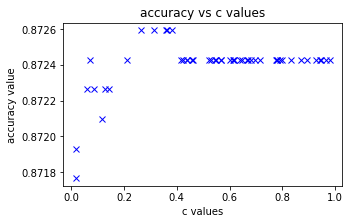

In [139]:
np.random.seed(0)
#create different values for c
c_val = np.random.rand(10,5).reshape(1,50).flatten()
c_val

acc_list = []
for c in c_val:
    #create an instance of logistic regression with varying c values
    model = LogisticRegression(C = c)
    #fit the model
    model.fit(x_train_sc, y_train)
    #model_df = model_evaluator(model, x_test_sc, y_test, threshold=optimal_threshold)
    #compute the accuracy
    pred = model.predict(x_test_sc)
    acc = accuracy_score(y_test, pred)
    #print(f"accuracy = {acc:.3f} for c values of {c:.2f}")
    #append accuracy scores into acc_list
    acc_list.append(acc)
    
plt.figure(figsize= (5,3))
plt.plot(c_val, acc_list, 'bx')
plt.xlabel("c values")
plt.ylabel("accuracy value")
plt.title("accuracy vs c values")



- this shows that at c value of 0.3, the accuracy increased to 0.8726. However, since i am interested in optimizing recall, i will use the previous value of 0.0202

## Rebuilding the model using c = 0.0202

train accuracy : 0.870


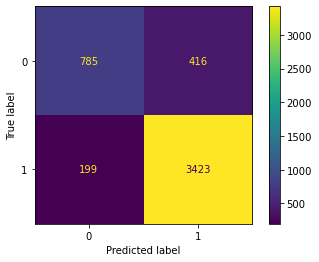

,Accuracy,Recall,Precision,f1
0,0.872486,0.945058,0.891638,0.917571


In [140]:
#create an instance of logistics regression
log_reg = LogisticRegression(random_state=0, C=0.0202)

#train the algorithm and return the train accuracy score of the model
log_reg_model = model_trainer(algorithm=log_reg, X=x_train_sc, y=y_train)

#evaluate the model
log_reg_df = model_evaluator(log_reg_model, x_val_sc, y_val)
log_reg_df

- the precision score of 0.891 means that 89.1% of the predictions of people that earn 50K at most were correct.
- the recall suggest that only 94.5% of the people that truly earned below 50K in the data were classified correctly.

- what this implies is that 89.1% of the under-priviledged people were classified correctly. Hence we will be making some wrong classifications by treating priviledged people as under-priviledged people (False Positives)
- since i am bent on optimizing the Recall, the False positives (rich people classified as poor people) will likely increase and this is why precision decreases. However the implication of this may be that our model might lead the government to put in more resources than necessary in alleviating this problem since the model will classify more people as poor even though in reality they earn above 50K annually and one disadvantage that can come from this could be wastage nevertheless, it has it's advantages.


## varying the class weight to alleviate the imbalance data problem

- if i wanted to optimize the precision, balacing the data might help me improve that, However, because i want to identify more of the majority class (1), it will most likely not favour me and i will show this shortly. I will slighlty increase the degree of imbalance by still giving more weights to the majority class so that the model will focus more on them and then do better at classifying them.

In [141]:
y_val.value_counts(normalize=True)

1    0.750985
0    0.249015
Name: salary, dtype: float64

- this shows the data is imbalanced.

train accuracy : 0.834


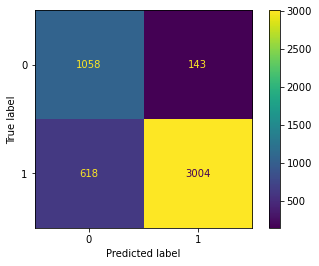

,Accuracy,Recall,Precision,f1
0,0.842214,0.829376,0.95456,0.887576


In [142]:
#create an instance of logistics regression
log_reg = LogisticRegression(random_state=0, C=optimal_c,class_weight='balanced')

#train the algorithm and return the train accuracy score of the model
log_reg_model = model_trainer(algorithm=log_reg, X=x_train_sc, y=y_train)

#evaluate the model
log_reg_df = model_evaluator(log_reg_model, x_val_sc, y_val)
log_reg_df

- based on our kpi, this model will not be the best because it decreased the Recall and increased the precision.

### explanation
- this model is making lesser mistakes at incorrectly identifying higher earners as lower earners. However the trade off is that it makes more mistakes in classifying lower income earners as high income earners.

- the recall value means that 82.9% of the people that earn below 50K in the data were correctly classified.
- the precision value means that only 95.5% of the people that were predicted to earn 50K at most truly earn that much.
- the f1 score is 0.89

### tweaking the class weights

train accuracy : 0.864


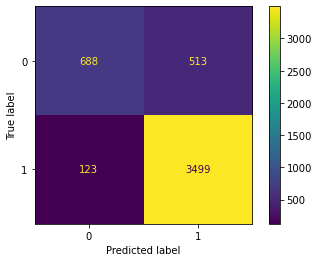

,Accuracy,Recall,Precision,f1
0,0.868132,0.966041,0.872134,0.916688


In [143]:
#create an instance of logistics regression
log_reg = LogisticRegression(random_state=0, C=optimal_c,class_weight={0:40, 1:60})#

#train the algorithm and return the train accuracy score of the model
log_reg_model = model_trainer(algorithm=log_reg, X=x_train_sc, y=y_train)

#evaluate the model
log_reg_df = model_evaluator(log_reg_model, x_val_sc, y_val)
log_reg_df

### explanation
- this model is making more mistakes at incorrectly identifying higher earners as lower earners. However it makes lesser mistakes at incorrectly classifying lower income earners as high income earners.

- the recall value means that 96.6% of the people that earn  50K at most  in the data were correctly classified.
- the precision value means that only 87.2% of the people that were predicted to earn 50K at most truly earn that much.
- the f1 score is 0.92



## Tweaking the Threshold to improve the model

- the idea behind changing the threshold is this:
    - prior to this time, the threshold have been 50%, which means that anybody that has a <= 50% likelihood of earning 50K at most is classified as as a priviledged person and those with likelihood > 50% of earning 50k at most is underpriviledged.
    - but to ensure that we accurately capture more underpriviledged people, lowering the probability will help us optimize the recall.
    - for example, a threshold of 30% will mean that except you have probability <= 0.3 of earning below 50K you will be classified as underpriviledged. the tradeoff is that more priviledged people will be wrongly misclassified.
    
## ROC-AUC
- the roc will helps me get the optimal threshold between the recall and the false positive rate.

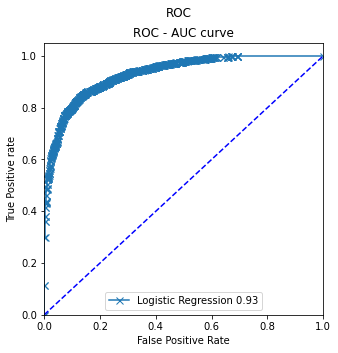

In [144]:
thre, tpr, fpr = roc(log_reg_model, x_val_sc, y_val)

In [145]:
#first get the index of the maximum diff between tpr and fpr
optimal_thres_index = np.argmax(tpr - fpr)  #return the index of max difference

optimal_threshold = thre[optimal_thres_index] #this is the best threshold

In [146]:
#value of the optimal threshold
optimal_threshold

0.809040129843024

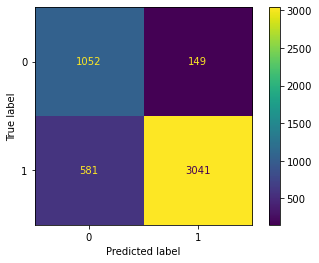

,Accuracy,Recall,Precision,f1
0,0.848642,0.839591,0.953292,0.892836


In [147]:
model_evaluator(log_reg_model, x_val_sc, y_val,threshold=optimal_threshold)

- the optimal threshold from the auc-roc curve is 0.809. and as expected, it lowered the recall and increased the precision.

## manually reducing the threshold to 0.45

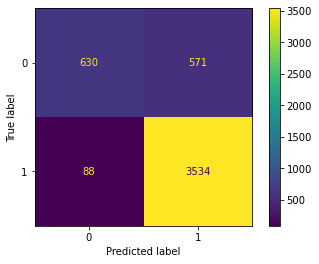

,Accuracy,Recall,Precision,f1
0,0.863363,0.975704,0.860901,0.914715


In [148]:
model_evaluator(log_reg_model, x_val_sc, y_val,threshold=0.45)

- setting the threshold at 0.45 means that for anybody to classified as priviledged, they must have at least a 0.45% chance of earning 50k at most. i.e the probability for them to earn below 50k must be very low and in this case 0.45.

- this model based on this threshold, the recall shows that 97.6% of less priviledged people in the data were accurately classified and the precision tells that only 86.1% of the predictions for those classified to earn 50K at most were accurate.
- the f1 is 0.91

In [149]:
from sklearn.metrics import precision_recall_curve



In [150]:
def prc(model, X, y):
    """
    display the roc curve
    model : model
    X : test features
    y : test target
    """
    pred = model.predict_proba(X)[:,1]
    #auc = roc_auc_score(y, pred)
    prec, rec, thre = precision_recall_curve(y, pred)
    
    plt.figure(figsize = (5,5))
    plt.plot(rec, prec, markersize = 7,)# label=(f"Logistic Regression {auc:.2f}" ))
    plt.plot([1,0],[0,1], "b--")
    plt.xlim(0,1)
    plt.ylim(0,1.05)
    #plt.legend(loc = "lower center")
    plt.ylabel("Precision")
    plt.xlabel("Recall")
    plt.title("Precision - Recall curve")
    plt.suptitle("PRC")
    plt.show()
    
    return thre, prec, rec #return the threshold, tpr and fpr

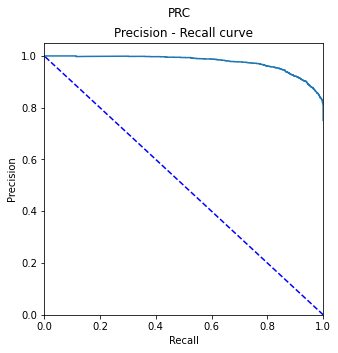

In [151]:
thre, prec, rec = prc(log_reg_model, x_val_sc, y_val)

- this chart depicts that the model performs well at optimizing both recall and precision.


## performance of the model on the test data

train accuracy : 0.864


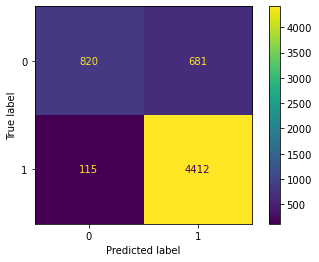

,Accuracy,Recall,Precision,f1
0,0.86795,0.974597,0.866287,0.917256


In [152]:
#create an instance of logistics regression
log_reg = LogisticRegression(random_state=0, C=optimal_c,class_weight={0:40, 1:60})#

#train the algorithm and return the train accuracy score of the model
log_reg_model = model_trainer(algorithm=log_reg, X=x_train_sc, y=y_train)

#evaluate the model
log_reg_df = model_evaluator(log_reg_model, x_test_sc, y_test, threshold=0.45)
log_reg_df

- similar values for all metrics were observed on the test data. This means that the model generalizes well and has higher likelihood of doing so to new data.

# Insights and Recommendations


- government should be adviced to create alternative investment opportunities or ammend fiscal and monetary policies that makes it easier for people to invest securely and maximize gains.
- Government should consider passing bills that will increase the salaries of workers under the local, state and federal government
- create welcoming business environment for people to venture into self-emp-inc type of businesses because this is the only workclass that has higher proportion of richer people to poor people.
- government could increase the minimum wage of employed people and mandate private institutions to comply.
- the social policy should carter for the military officers. it should sensitize them on investment opportunities.
- it should also create more study opportunities for officers that want to further their studies.
- social policy should augment efforts channelled at educating the less priviledged such as scholarship opportunities, study grants etc. this could breach the knowledge gap
- government should focus more on empowering younger people within the ages 14-45.
- the federal government should aim to employ more people.
- majority of the population were high school graduates. Encouraging them to learn a specilaized course aside formal education could increase their chances of earning higher.
- the social policy by the government should assist those people with children by giving money reliefs to assist the family or creating new care giver jobs for the unemployed people under the government's payroll such that the fees to hire a care giver becomes subsidized by the government. Due to this people with child may be able to work more and earn higher than they do.
- Government should release social policy that improves the racial blend in organization's employment schemes. this means that the policy should mandate organizations to develop a workspace of people from different cultural background by employing other races than whites
- the government could put effort in empowering more women in the society.

- The model will most likely classify more priviledge people as underpriviledged. Setting up a task-force to ensure an appropriate implementation of these policies to the right class is necessary.